Load the libraries.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from scipy import optimize
import cvxopt as opt
from cvxopt import blas, solvers

In [3]:
solvers.options['show progress'] = False

# number of assets
n_assets = 4

# number of observations
n_obs = 2000

# generate random returns

return_vec = np.random.randn(n_assets,n_obs)

def rand_weights(n):
    '''
    This will produce weights that add up to 1 or 100%
    '''
    
    k = np.random.rand(n)
    return k / sum(k)


def random_portfolio(returns):
    '''
    Produce the returns and the standard deviation for our random
    portfolios
    '''
    
    # returns matrix
    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    return mu, sigma
    
def optimal_portfolios(returns):
    
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 10000
    
    mus = [100**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    ## Calculate the risk and returns of the frontier
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    return returns, risks

In [4]:
n_portfolios = 10000

means, stds = np.column_stack([random_portfolio(return_vec) for x in range(n_portfolios)])

returns, risks = optimal_portfolios(return_vec)

     pcost       dcost       gap    pres   dres
 0: -2.3194e-03 -1.0368e+00  1e+00  6e-17  3e+00
 1: -3.4387e-03 -4.6622e-02  4e-02  6e-17  1e-01
 2: -3.2233e-02 -4.3484e-02  1e-02  1e-16  9e-04
 3: -3.3363e-02 -3.3584e-02  2e-04  1e-16  2e-05
 4: -3.3483e-02 -3.3485e-02  2e-06  4e-16  2e-07
 5: -3.3484e-02 -3.3484e-02  2e-08  2e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3164e-03 -1.0368e+00  1e+00  3e-16  3e+00
 1: -3.4357e-03 -4.6618e-02  4e-02  8e-17  1e-01
 2: -3.2220e-02 -4.3469e-02  1e-02  1e-16  9e-04
 3: -3.3352e-02 -3.3573e-02  2e-04  2e-16  2e-05
 4: -3.3471e-02 -3.3474e-02  2e-06  9e-17  2e-07
 5: -3.3473e-02 -3.3473e-02  2e-08  2e-17  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3135e-03 -1.0368e+00  1e+00  0e+00  3e+00
 1: -3.4327e-03 -4.6614e-02  4e-02  8e-17  1e-01
 2: -3.2207e-02 -4.3454e-02  1e-02  5e-16  9e-04
 3: -3.3340e-02 -3.3561e-02  2e-04  2e-16  2e-05
 4: -3.3460e-02 -3.3462e

 5: -3.2715e-02 -3.2715e-02  2e-08  4e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1167e-03 -1.0365e+00  1e+00  6e-17  3e+00
 1: -3.2312e-03 -4.6340e-02  4e-02  8e-17  1e-01
 2: -3.1194e-02 -4.2459e-02  1e-02  1e-16  4e-17
 3: -3.2550e-02 -3.2799e-02  2e-04  2e-16  3e-17
 4: -3.2700e-02 -3.2703e-02  3e-06  3e-17  1e-17
 5: -3.2702e-02 -3.2702e-02  3e-08  9e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1133e-03 -1.0365e+00  1e+00  3e-17  3e+00
 1: -3.2277e-03 -4.6335e-02  4e-02  9e-17  1e-01
 2: -3.1174e-02 -4.2442e-02  1e-02  1e-16  3e-17
 3: -3.2536e-02 -3.2786e-02  2e-04  2e-16  4e-17
 4: -3.2687e-02 -3.2690e-02  3e-06  1e-16  2e-17
 5: -3.2689e-02 -3.2689e-02  3e-08  4e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1099e-03 -1.0365e+00  1e+00  1e-16  3e+00
 1: -3.2242e-03 -4.6330e-02  4e-02  1e-16  1e-01
 2: -3.1153e-02 -4.2425e-02  1e-02  6e-16  1e-17


     pcost       dcost       gap    pres   dres
 0: -1.8298e-03 -1.0362e+00  1e+00  1e-16  3e+00
 1: -2.9375e-03 -4.5940e-02  4e-02  8e-17  1e-01
 2: -2.9505e-02 -4.1040e-02  1e-02  4e-16  3e-17
 3: -3.1373e-02 -3.1689e-02  3e-04  1e-16  3e-17
 4: -3.1592e-02 -3.1595e-02  3e-06  2e-17  1e-17
 5: -3.1595e-02 -3.1595e-02  3e-08  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8257e-03 -1.0362e+00  1e+00  3e-17  3e+00
 1: -2.9333e-03 -4.5934e-02  4e-02  8e-17  1e-01
 2: -2.9481e-02 -4.1020e-02  1e-02  1e-16  2e-17
 3: -3.1356e-02 -3.1674e-02  3e-04  2e-16  3e-17
 4: -3.1577e-02 -3.1580e-02  3e-06  8e-17  2e-17
 5: -3.1579e-02 -3.1579e-02  3e-08  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8217e-03 -1.0362e+00  1e+00  6e-17  3e+00
 1: -2.9292e-03 -4.5929e-02  4e-02  1e-16  1e-01
 2: -2.9458e-02 -4.1000e-02  1e-02  1e-16  3e-17
 3: -3.1339e-02 -3.1658e-02  3e-04  2e-16  2e-17
 4: -3.1561e-02 -3.1564e

 0: -1.4629e-03 -1.0357e+00  1e+00  1e-16  3e+00
 1: -2.5620e-03 -4.5430e-02  4e-02  2e-16  1e-01
 2: -2.7502e-02 -3.9274e-02  1e-02  1e-16  1e-17
 3: -2.9860e-02 -3.0271e-02  4e-04  3e-16  1e-17
 4: -3.0175e-02 -3.0179e-02  4e-06  1e-16  2e-17
 5: -3.0178e-02 -3.0178e-02  4e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4580e-03 -1.0357e+00  1e+00  1e-16  3e+00
 1: -2.5570e-03 -4.5423e-02  4e-02  1e-16  1e-01
 2: -2.7476e-02 -3.9251e-02  1e-02  2e-16  3e-17
 3: -2.9840e-02 -3.0252e-02  4e-04  3e-16  1e-17
 4: -3.0156e-02 -3.0160e-02  4e-06  3e-16  9e-18
 5: -3.0159e-02 -3.0159e-02  4e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4531e-03 -1.0357e+00  1e+00  4e-16  3e+00
 1: -2.5519e-03 -4.5416e-02  4e-02  9e-17  1e-01
 2: -2.7450e-02 -3.9227e-02  1e-02  1e-16  3e-17
 3: -2.9819e-02 -3.0233e-02  4e-04  1e-16  2e-17
 4: -3.0137e-02 -3.0141e-02  5e-06  2e-16  1e-17
 5: -3.0140e-02 -3.0140

     pcost       dcost       gap    pres   dres
 0: -1.0140e-03 -1.0351e+00  1e+00  1e-16  3e+00
 1: -2.1026e-03 -4.4806e-02  4e-02  6e-17  1e-01
 2: -2.5261e-02 -3.7187e-02  1e-02  3e-16  4e-17
 3: -2.8006e-02 -2.8540e-02  5e-04  2e-16  4e-17
 4: -2.8438e-02 -2.8446e-02  7e-06  1e-16  2e-17
 5: -2.8445e-02 -2.8445e-02  7e-08  3e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0080e-03 -1.0351e+00  1e+00  1e-16  3e+00
 1: -2.0966e-03 -4.4798e-02  4e-02  1e-16  1e-01
 2: -2.5232e-02 -3.7159e-02  1e-02  2e-16  4e-17
 3: -2.7982e-02 -2.8517e-02  5e-04  1e-16  3e-17
 4: -2.8415e-02 -2.8423e-02  7e-06  2e-16  2e-17
 5: -2.8422e-02 -2.8422e-02  7e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0021e-03 -1.0351e+00  1e+00  6e-17  3e+00
 1: -2.0905e-03 -4.4790e-02  4e-02  1e-16  1e-01
 2: -2.5204e-02 -3.7132e-02  1e-02  2e-17  2e-17
 3: -2.7957e-02 -2.8494e-02  5e-04  2e-16  1e-17
 4: -2.8392e-02 -2.8400e

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2766e-04 -1.0345e+00  1e+00  2e-16  3e+00
 1: -1.6052e-03 -4.4132e-02  4e-02  2e-16  1e-01
 2: -2.3056e-02 -3.5017e-02  1e-02  1e-16  3e-17
 3: -2.6015e-02 -2.6674e-02  7e-04  2e-16  2e-17
 4: -2.6551e-02 -2.6567e-02  2e-05  1e-16  2e-17
 5: -2.6566e-02 -2.6566e-02  2e-07  1e-16  8e-18
 6: -2.6566e-02 -2.6566e-02  2e-09  7e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2059e-04 -1.0345e+00  1e+00  2e-16  3e+00
 1: -1.5979e-03 -4.4122e-02  4e-02  1e-16  1e-01
 2: -2.3025e-02 -3.4986e-02  1e-02  1e-16  8e-18
 3: -2.5986e-02 -2.6647e-02  7e-04  1e-16  9e-18
 4: -2.6523e-02 -2.6540e-02  2e-05  2e-16  2e-17
 5: -2.6539e-02 -2.6539e-02  2e-07  1e-16  2e-17
 6: -2.6539e-02 -2.6539e-02  2e-09  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.1351e-04 -1.0345e+00  1e+00  2e-16  3e+00
 1: -1.5907e-03 -4.4113e-02  4e-02  6e-17  1e-01


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3405e-05 -1.0338e+00  1e+00  3e-17  3e+00
 1: -1.0314e-03 -4.3357e-02  4e-02  2e-16  1e-01
 2: -2.0753e-02 -3.2628e-02  1e-02  6e-17  3e-17
 3: -2.3774e-02 -2.4549e-02  8e-04  9e-18  7e-18
 4: -2.4360e-02 -2.4400e-02  4e-05  2e-16  8e-18
 5: -2.4398e-02 -2.4399e-02  6e-07  1e-16  8e-18
 6: -2.4399e-02 -2.4399e-02  6e-09  2e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1763e-05 -1.0338e+00  1e+00  6e-17  3e+00
 1: -1.0229e-03 -4.3345e-02  4e-02  1e-16  1e-01
 2: -2.0720e-02 -3.2594e-02  1e-02  2e-16  2e-17
 3: -2.3741e-02 -2.4518e-02  8e-04  2e-16  8e-18
 4: -2.4328e-02 -2.4368e-02  4e-05  1e-16  1e-17
 5: -2.4366e-02 -2.4366e-02  6e-07  4e-17  1e-17
 6: -2.4366e-02 -2.4366e-02  6e-09  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.0141e-05 -1.0338e+00  1e+00  3e-17  3e+00
 1: -1.0143e-03 -4.3333e-02  4e-02  9e-17  1e-01


 2: -1.8443e-02 -3.0110e-02  1e-02  2e-16  3e-17
 3: -2.1396e-02 -2.2242e-02  8e-04  2e-16  2e-17
 4: -2.1945e-02 -2.2006e-02  6e-05  6e-17  7e-18
 5: -2.1980e-02 -2.1988e-02  8e-06  2e-16  1e-17
 6: -2.1985e-02 -2.1986e-02  8e-07  2e-16  2e-17
 7: -2.1986e-02 -2.1986e-02  2e-08  2e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6739e-04 -1.0330e+00  1e+00  2e-16  3e+00
 1: -3.8335e-04 -4.2482e-02  4e-02  8e-17  1e-01
 2: -1.8409e-02 -3.0071e-02  1e-02  1e-16  2e-17
 3: -2.1360e-02 -2.2206e-02  8e-04  2e-16  3e-17
 4: -2.1908e-02 -2.1969e-02  6e-05  1e-17  1e-17
 5: -2.1943e-02 -2.1950e-02  8e-06  1e-16  1e-17
 6: -2.1947e-02 -2.1948e-02  9e-07  3e-16  9e-18
 7: -2.1948e-02 -2.1948e-02  3e-08  1e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7721e-04 -1.0330e+00  1e+00  6e-17  3e+00
 1: -3.7332e-04 -4.2469e-02  4e-02  8e-17  1e-01
 2: -1.8374e-02 -3.0033e-02  1e-02  1e-16  1e-17
 3: -2.1324e-02 -2.2171

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3775e-03 -1.0321e+00  1e+00  3e-17  3e+00
 1:  3.4228e-04 -4.1506e-02  4e-02  6e-17  1e-01
 2: -1.6047e-02 -2.7374e-02  1e-02  2e-16  3e-17
 3: -1.8842e-02 -1.9695e-02  9e-04  2e-16  6e-18
 4: -1.9347e-02 -1.9382e-02  3e-05  1e-16  6e-18
 5: -1.9360e-02 -1.9361e-02  4e-07  9e-17  5e-18
 6: -1.9361e-02 -1.9361e-02  4e-09  1e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3890e-03 -1.0321e+00  1e+00  1e-16  3e+00
 1:  3.5397e-04 -4.1490e-02  4e-02  2e-16  1e-01
 2: -1.6011e-02 -2.7332e-02  1e-02  8e-17  2e-17
 3: -1.8803e-02 -1.9655e-02  9e-04  1e-16  1e-17
 4: -1.9308e-02 -1.9343e-02  3e-05  2e-17  2e-17
 5: -1.9321e-02 -1.9322e-02  4e-07  2e-16  1e-17
 6: -1.9321e-02 -1.9321e-02  4e-09  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4004e-03 -1.0321e+00  1e+00  2e-16  3e+00
 1:  3.6570e-04 -4.1474e-02  4e-02  8e-17  1e-01


 5: -1.6577e-02 -1.6577e-02  3e-07  2e-16  8e-18
 6: -1.6577e-02 -1.6577e-02  3e-09  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2593e-03 -1.0310e+00  1e+00  8e-17  3e+00
 1:  1.2429e-03 -4.0297e-02  4e-02  1e-16  1e-01
 2: -1.3427e-02 -2.4251e-02  1e-02  1e-16  2e-17
 3: -1.5995e-02 -1.6791e-02  8e-04  2e-16  6e-18
 4: -1.6514e-02 -1.6539e-02  3e-05  3e-17  9e-18
 5: -1.6536e-02 -1.6536e-02  3e-07  2e-16  5e-18
 6: -1.6536e-02 -1.6536e-02  3e-09  2e-16  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2728e-03 -1.0310e+00  1e+00  3e-16  3e+00
 1:  1.2567e-03 -4.0279e-02  4e-02  8e-17  1e-01
 2: -1.3389e-02 -2.4205e-02  1e-02  2e-16  2e-17
 3: -1.5953e-02 -1.6748e-02  8e-04  1e-16  7e-18
 4: -1.6473e-02 -1.6498e-02  3e-05  1e-16  6e-18
 5: -1.6495e-02 -1.6496e-02  3e-07  1e-16  8e-18
 6: -1.6496e-02 -1.6496e-02  3e-09  2e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres


 1:  2.3023e-03 -3.8881e-02  4e-02  1e-16  1e-01
 2: -1.0687e-02 -2.0859e-02  1e-02  6e-17  2e-17
 3: -1.2986e-02 -1.3701e-02  7e-04  1e-16  2e-17
 4: -1.3526e-02 -1.3557e-02  3e-05  1e-16  4e-18
 5: -1.3554e-02 -1.3555e-02  3e-07  2e-16  5e-18
 6: -1.3555e-02 -1.3555e-02  3e-09  1e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3130e-03 -1.0297e+00  1e+00  2e-16  3e+00
 1:  2.3185e-03 -3.8859e-02  4e-02  1e-16  1e-01
 2: -1.0648e-02 -2.0810e-02  1e-02  1e-16  9e-18
 3: -1.2942e-02 -1.3656e-02  7e-04  1e-16  1e-17
 4: -1.3482e-02 -1.3514e-02  3e-05  2e-16  9e-18
 5: -1.3511e-02 -1.3511e-02  3e-07  1e-16  6e-18
 6: -1.3511e-02 -1.3511e-02  3e-09  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3289e-03 -1.0297e+00  1e+00  2e-16  3e+00
 1:  2.3347e-03 -3.8838e-02  4e-02  1e-16  1e-01
 2: -1.0609e-02 -2.0760e-02  1e-02  1e-16  8e-18
 3: -1.2899e-02 -1.3611e-02  7e-04  1e-16  2e-17
 4: -1.3438e-02 -1.3470

 1:  3.5673e-03 -3.7196e-02  4e-02  7e-17  1e-01
 2: -7.7850e-03 -1.7158e-02  9e-03  1e-16  2e-17
 3: -9.7190e-03 -1.0618e-02  9e-04  6e-17  1e-17
 4: -1.0231e-02 -1.0302e-02  7e-05  1e-16  5e-18
 5: -1.0285e-02 -1.0289e-02  4e-06  2e-16  4e-18
 6: -1.0289e-02 -1.0289e-02  6e-08  1e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5559e-03 -1.0282e+00  1e+00  1e-16  3e+00
 1:  3.5864e-03 -3.7171e-02  4e-02  1e-16  1e-01
 2: -7.7438e-03 -1.7105e-02  9e-03  3e-16  2e-17
 3: -9.6727e-03 -1.0574e-02  9e-04  1e-16  2e-18
 4: -1.0184e-02 -1.0255e-02  7e-05  1e-16  1e-17
 5: -1.0237e-02 -1.0241e-02  5e-06  2e-16  1e-17
 6: -1.0241e-02 -1.0241e-02  6e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5746e-03 -1.0282e+00  1e+00  0e+00  3e+00
 1:  3.6055e-03 -3.7146e-02  4e-02  1e-16  1e-01
 2: -7.7025e-03 -1.7052e-02  9e-03  1e-16  2e-17
 3: -9.6264e-03 -1.0529e-02  9e-04  2e-16  2e-17
 4: -1.0136e-02 -1.0208

 1:  4.8583e-03 -3.5485e-02  4e-02  1e-16  1e-01
 2: -5.1337e-03 -1.3713e-02  9e-03  1e-16  6e-18
 3: -6.7555e-03 -7.6636e-03  9e-04  2e-16  2e-17
 4: -7.1615e-03 -7.2364e-03  7e-05  1e-16  9e-18
 5: -7.1925e-03 -7.1961e-03  4e-06  1e-16  8e-18
 6: -7.1928e-03 -7.1928e-03  5e-08  1e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8250e-03 -1.0266e+00  1e+00  2e-16  3e+00
 1:  4.8803e-03 -3.5456e-02  4e-02  1e-16  1e-01
 2: -5.0907e-03 -1.3657e-02  9e-03  1e-16  1e-17
 3: -6.7076e-03 -7.6147e-03  9e-04  1e-16  7e-18
 4: -7.1117e-03 -7.1864e-03  7e-05  1e-16  9e-18
 5: -7.1426e-03 -7.1460e-03  3e-06  1e-16  8e-18
 6: -7.1429e-03 -7.1429e-03  4e-08  2e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8467e-03 -1.0266e+00  1e+00  2e-16  3e+00
 1:  4.9024e-03 -3.5427e-02  4e-02  2e-16  1e-01
 2: -5.0477e-03 -1.3601e-02  9e-03  1e-16  2e-17
 3: -6.6597e-03 -7.5657e-03  9e-04  7e-17  8e-18
 4: -7.0620e-03 -7.1363

 2: -1.9115e-03 -9.4918e-03  8e-03  1e-16  2e-17
 3: -3.1810e-03 -3.9528e-03  8e-04  2e-16  2e-17
 4: -3.4647e-03 -3.5132e-03  5e-05  1e-16  9e-18
 5: -3.5008e-03 -3.5017e-03  9e-07  2e-16  3e-18
 6: -3.5016e-03 -3.5016e-03  9e-09  2e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.5440e-03 -1.0245e+00  1e+00  1e-16  3e+00
 1:  6.6315e-03 -3.3147e-02  4e-02  2e-16  1e-01
 2: -1.8661e-03 -9.4323e-03  8e-03  1e-16  2e-17
 3: -3.1309e-03 -3.9002e-03  8e-04  1e-16  6e-18
 4: -3.4131e-03 -3.4614e-03  5e-05  1e-16  6e-18
 5: -3.4493e-03 -3.4502e-03  9e-07  1e-16  1e-17
 6: -3.4501e-03 -3.4501e-03  9e-09  1e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.5696e-03 -1.0245e+00  1e+00  3e-17  3e+00
 1:  6.6576e-03 -3.3112e-02  4e-02  1e-16  1e-01
 2: -1.8207e-03 -9.3728e-03  8e-03  1e-16  2e-17
 3: -3.0807e-03 -3.8475e-03  8e-04  2e-16  1e-17
 4: -3.3614e-03 -3.4095e-03  5e-05  1e-16  7e-18
 5: -3.3978e-03 -3.3987

     pcost       dcost       gap    pres   dres
 0:  9.5154e-03 -1.0221e+00  1e+00  2e-16  3e+00
 1:  8.6382e-03 -3.0517e-02  4e-02  1e-16  1e-01
 2:  1.4563e-03 -5.0930e-03  7e-03  1e-16  2e-17
 3:  5.1414e-04 -6.3476e-05  6e-04  1e-16  7e-18
 4:  3.4151e-04  2.8360e-04  6e-05  7e-17  5e-18
 5:  3.0739e-04  3.0092e-04  6e-06  3e-17  4e-18
 6:  3.0208e-04  3.0188e-04  2e-07  1e-16  3e-18
 7:  3.0189e-04  3.0189e-04  2e-09  1e-17  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.5455e-03 -1.0220e+00  1e+00  2e-16  3e+00
 1:  8.6688e-03 -3.0477e-02  4e-02  8e-17  1e-01
 2:  1.5046e-03 -5.0303e-03  7e-03  8e-17  2e-17
 3:  5.6675e-04 -8.1454e-06  6e-04  6e-17  4e-18
 4:  3.9560e-04  3.3771e-04  6e-05  2e-16  5e-18
 5:  3.6191e-04  3.5532e-04  7e-06  1e-17  8e-18
 6:  3.5657e-04  3.5634e-04  2e-07  8e-17  8e-18
 7:  3.5635e-04  3.5635e-04  2e-09  6e-17  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.5757e-03 -1.0220e

     pcost       dcost       gap    pres   dres
 0:  1.1554e-02 -1.0196e+00  1e+00  2e-16  3e+00
 1:  1.0711e-02 -2.7818e-02  4e-02  8e-17  1e-01
 2:  4.5928e-03 -1.0500e-03  6e-03  2e-16  1e-17
 3:  3.9048e-03  3.4877e-03  4e-04  7e-17  3e-18
 4:  3.8178e-03  3.7741e-03  4e-05  2e-16  2e-17
 5:  3.8117e-03  3.8086e-03  3e-06  1e-16  5e-18
 6:  3.8116e-03  3.8116e-03  4e-08  6e-17  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1589e-02 -1.0195e+00  1e+00  6e-17  3e+00
 1:  1.0747e-02 -2.7772e-02  4e-02  1e-16  1e-01
 2:  4.6443e-03 -9.8427e-04  6e-03  2e-16  1e-17
 3:  3.9600e-03  3.5452e-03  4e-04  1e-16  8e-18
 4:  3.8740e-03  3.8308e-03  4e-05  1e-16  7e-18
 5:  3.8682e-03  3.8653e-03  3e-06  1e-16  6e-18
 6:  3.8682e-03  3.8681e-03  3e-08  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1624e-02 -1.0195e+00  1e+00  6e-17  3e+00
 1:  1.0782e-02 -2.7726e-02  4e-02  1e-16  1e-01
 2:  4.6957e-03 -9.1854e

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4273e-02 -1.0163e+00  1e+00  1e-16  3e+00
 1:  1.3474e-02 -2.4249e-02  4e-02  1e-16  9e-02
 2:  8.4466e-03  3.8081e-03  5e-03  1e-16  1e-17
 3:  7.9964e-03  7.7248e-03  3e-04  1e-16  2e-17
 4:  7.9687e-03  7.9548e-03  1e-05  3e-17  8e-18
 5:  7.9685e-03  7.9684e-03  1e-07  2e-16  1e-17
 6:  7.9685e-03  7.9685e-03  1e-09  6e-17  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4314e-02 -1.0162e+00  1e+00  1e-16  3e+00
 1:  1.3516e-02 -2.4195e-02  4e-02  1e-16  9e-02
 2:  8.5025e-03  3.8775e-03  5e-03  1e-16  3e-17
 3:  8.0552e-03  7.7853e-03  3e-04  1e-16  5e-18
 4:  8.0279e-03  8.0143e-03  1e-05  3e-17  1e-17
 5:  8.0277e-03  8.0276e-03  1e-07  1e-16  1e-17
 6:  8.0277e-03  8.0277e-03  1e-09  1e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4356e-02 -1.0162e+00  1e+00  3e-17  3e+00
 1:  1.3557e-02 -2.4141e-02  4e-02  1e-16  9e-02


 0:  1.7722e-02 -1.0121e+00  1e+00  0e+00  3e+00
 1:  1.6973e-02 -1.9771e-02  4e-02  2e-16  9e-02
 2:  1.2965e-02  9.3237e-03  4e-03  1e-16  3e-17
 3:  1.2700e-02  1.2517e-02  2e-04  1e-16  1e-17
 4:  1.2694e-02  1.2691e-02  3e-06  6e-17  6e-18
 5:  1.2694e-02  1.2694e-02  3e-08  1e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7771e-02 -1.0121e+00  1e+00  2e-16  3e+00
 1:  1.7023e-02 -1.9708e-02  4e-02  2e-16  9e-02
 2:  1.3027e-02  9.3978e-03  4e-03  8e-17  1e-17
 3:  1.2764e-02  1.2582e-02  2e-04  8e-17  1e-17
 4:  1.2758e-02  1.2755e-02  3e-06  1e-16  1e-17
 5:  1.2758e-02  1.2758e-02  3e-08  6e-17  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7820e-02 -1.0120e+00  1e+00  1e-16  3e+00
 1:  1.7073e-02 -1.9644e-02  4e-02  6e-17  9e-02
 2:  1.3089e-02  9.4719e-03  4e-03  1e-16  2e-17
 3:  1.2828e-02  1.2647e-02  2e-04  8e-17  2e-17
 4:  1.2822e-02  1.2819e-02  3e-06  6e-17  2e-17
 5:  1.2822e-02  1.2822

 5:  1.7996e-02  1.7996e-02  1e-08  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2009e-02 -1.0070e+00  1e+00  6e-17  3e+00
 1:  2.1317e-02 -1.4275e-02  4e-02  6e-17  9e-02
 2:  1.8209e-02  1.5483e-02  3e-03  8e-17  2e-17
 3:  1.8067e-02  1.7964e-02  1e-04  1e-16  1e-17
 4:  1.8066e-02  1.8065e-02  1e-06  2e-16  1e-17
 5:  1.8066e-02  1.8066e-02  1e-08  6e-17  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2067e-02 -1.0069e+00  1e+00  2e-16  3e+00
 1:  2.1377e-02 -1.4200e-02  4e-02  2e-16  9e-02
 2:  1.8279e-02  1.5563e-02  3e-03  8e-17  9e-18
 3:  1.8138e-02  1.8036e-02  1e-04  6e-17  8e-18
 4:  1.8137e-02  1.8136e-02  1e-06  1e-16  1e-17
 5:  1.8137e-02  1.8137e-02  1e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2126e-02 -1.0068e+00  1e+00  2e-16  3e+00
 1:  2.1436e-02 -1.4125e-02  4e-02  6e-17  9e-02
 2:  1.8349e-02  1.5644e-02  3e-03  1e-16  9e-18


 2:  2.4402e-02  2.2425e-02  2e-03  8e-17  1e-04
 3:  2.4333e-02  2.4283e-02  5e-05  9e-17  2e-06
 4:  2.4333e-02  2.4332e-02  5e-07  7e-17  2e-08
 5:  2.4333e-02  2.4333e-02  5e-09  8e-17  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7437e-02 -1.0005e+00  1e+00  1e-16  3e+00
 1:  2.6810e-02 -7.4194e-03  3e-02  7e-17  9e-02
 2:  2.4483e-02  2.2510e-02  2e-03  9e-17  1e-04
 3:  2.4414e-02  2.4364e-02  5e-05  8e-17  2e-06
 4:  2.4413e-02  2.4413e-02  5e-07  1e-16  2e-08
 5:  2.4413e-02  2.4413e-02  5e-09  6e-17  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7508e-02 -1.0005e+00  1e+00  0e+00  3e+00
 1:  2.6882e-02 -7.3304e-03  3e-02  1e-16  8e-02
 2:  2.4563e-02  2.2596e-02  2e-03  1e-16  1e-04
 3:  2.4494e-02  2.4446e-02  5e-05  8e-17  2e-06
 4:  2.4494e-02  2.4494e-02  5e-07  1e-16  2e-08
 5:  2.4494e-02  2.4494e-02  5e-09  1e-16  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres


 5:  3.1438e-02  3.1438e-02  3e-09  8e-17  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3839e-02 -9.9302e-01  1e+00  3e-17  3e+00
 1:  3.3279e-02  5.3210e-04  3e-02  8e-17  8e-02
 2:  3.1565e-02  3.0033e-02  2e-03  1e-16  6e-04
 3:  3.1531e-02  3.1506e-02  3e-05  2e-16  7e-06
 4:  3.1531e-02  3.1531e-02  3e-07  1e-16  7e-08
 5:  3.1531e-02  3.1531e-02  3e-09  6e-17  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3925e-02 -9.9292e-01  1e+00  6e-17  3e+00
 1:  3.3365e-02  6.3762e-04  3e-02  6e-17  8e-02
 2:  3.1658e-02  3.0131e-02  2e-03  7e-17  6e-04
 3:  3.1625e-02  3.1599e-02  3e-05  1e-16  7e-06
 4:  3.1625e-02  3.1624e-02  3e-07  1e-16  7e-08
 5:  3.1625e-02  3.1625e-02  3e-09  1e-16  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4011e-02 -9.9282e-01  1e+00  3e-17  3e+00
 1:  3.3452e-02  7.4335e-04  3e-02  1e-16  8e-02
 2:  3.1751e-02  3.0230e-02  2e-03  6e-17  6e-04


     pcost       dcost       gap    pres   dres
 0:  4.1250e-02 -9.8442e-01  1e+00  8e-17  3e+00
 1:  4.0754e-02  9.5725e-03  3e-02  1e-16  8e-02
 2:  3.9504e-02  3.8339e-02  1e-03  1e-16  8e-04
 3:  3.9489e-02  3.9474e-02  1e-05  6e-17  9e-06
 4:  3.9489e-02  3.9489e-02  1e-07  1e-16  9e-08
 5:  3.9489e-02  3.9489e-02  1e-09  8e-17  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1352e-02 -9.8430e-01  1e+00  1e-16  3e+00
 1:  4.0857e-02  9.6966e-03  3e-02  6e-17  8e-02
 2:  3.9613e-02  3.8452e-02  1e-03  9e-17  8e-04
 3:  3.9598e-02  3.9583e-02  1e-05  8e-17  9e-06
 4:  3.9598e-02  3.9598e-02  1e-07  1e-16  9e-08
 5:  3.9598e-02  3.9598e-02  1e-09  9e-17  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1455e-02 -9.8418e-01  1e+00  3e-17  3e+00
 1:  4.0961e-02  9.8209e-03  3e-02  1e-16  8e-02
 2:  3.9722e-02  3.8565e-02  1e-03  1e-16  8e-04
 3:  3.9707e-02  3.9692e-02  1e-05  1e-16  9e-06
 4:  3.9707e-02  3.9707e

 1:  5.0438e-02  2.1074e-02  3e-02  6e-17  7e-02
 2:  4.9570e-02  4.8720e-02  9e-04  1e-16  9e-04
 3:  4.9564e-02  4.9555e-02  9e-06  1e-16  9e-06
 4:  4.9564e-02  4.9564e-02  9e-08  6e-17  9e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.0988e-02 -9.7325e-01  1e+00  3e-17  3e+00
 1:  5.0563e-02  2.1222e-02  3e-02  1e-16  7e-02
 2:  4.9700e-02  4.8853e-02  8e-04  1e-16  9e-04
 3:  4.9694e-02  4.9684e-02  9e-06  1e-16  9e-06
 4:  4.9694e-02  4.9693e-02  9e-08  1e-16  9e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1113e-02 -9.7310e-01  1e+00  8e-17  3e+00
 1:  5.0689e-02  2.1370e-02  3e-02  1e-16  7e-02
 2:  4.9829e-02  4.8986e-02  8e-04  1e-16  9e-04
 3:  4.9823e-02  4.9814e-02  9e-06  3e-17  9e-06
 4:  4.9823e-02  4.9823e-02  9e-08  6e-17  9e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1238e-02 -9.7296e-01  1e+00  3e-16  3e+00
 1:  5.0815e-02  2.1518e-02  3e-02  1e-16  7e-02


 0:  6.3599e-02 -9.5898e-01  1e+00  2e-16  3e+00
 1:  6.3246e-02  3.5976e-02  3e-02  8e-17  7e-02
 2:  6.2679e-02  6.2080e-02  6e-04  6e-17  8e-04
 3:  6.2677e-02  6.2671e-02  6e-06  2e-16  8e-06
 4:  6.2677e-02  6.2677e-02  6e-08  8e-17  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.3753e-02 -9.5881e-01  1e+00  1e-16  3e+00
 1:  6.3401e-02  3.6154e-02  3e-02  8e-17  7e-02
 2:  6.2837e-02  6.2240e-02  6e-04  1e-16  8e-04
 3:  6.2834e-02  6.2828e-02  6e-06  1e-16  8e-06
 4:  6.2834e-02  6.2834e-02  6e-08  7e-17  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.3907e-02 -9.5863e-01  1e+00  1e-16  3e+00
 1:  6.3555e-02  3.6332e-02  3e-02  6e-17  7e-02
 2:  6.2994e-02  6.2399e-02  6e-04  8e-17  8e-04
 3:  6.2992e-02  6.2986e-02  6e-06  6e-17  8e-06
 4:  6.2992e-02  6.2992e-02  6e-08  6e-17  8e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.4061e-02 -9.5846e-01  1e+00  2e-16  3e+00


 2:  7.9242e-02  7.8817e-02  4e-04  9e-17  7e-04
 3:  7.9241e-02  7.9237e-02  4e-06  1e-16  7e-06
 4:  7.9241e-02  7.9241e-02  4e-08  2e-16  7e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.0070e-02 -9.4063e-01  1e+00  2e-16  3e+00
 1:  7.9787e-02  5.4789e-02  2e-02  1e-16  6e-02
 2:  7.9435e-02  7.9012e-02  4e-04  7e-17  7e-04
 3:  7.9434e-02  7.9430e-02  4e-06  6e-17  7e-06
 4:  7.9434e-02  7.9434e-02  4e-08  8e-17  7e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.0261e-02 -9.4042e-01  1e+00  3e-17  3e+00
 1:  7.9979e-02  5.5005e-02  2e-02  3e-17  6e-02
 2:  7.9629e-02  7.9207e-02  4e-04  1e-16  7e-04
 3:  7.9628e-02  7.9624e-02  4e-06  7e-17  7e-06
 4:  7.9628e-02  7.9628e-02  4e-08  6e-17  7e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.0453e-02 -9.4021e-01  1e+00  8e-17  3e+00
 1:  8.0171e-02  5.5221e-02  2e-02  9e-17  6e-02
 2:  7.9823e-02  7.9403e-02  4e-04  6e-17  7e-04


 4:  9.9904e-02  9.9904e-02  3e-08  1e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0058e-01 -9.1815e-01  1e+00  4e-16  3e+00
 1:  1.0035e-01  7.7649e-02  2e-02  9e-17  6e-02
 2:  1.0014e-01  9.9816e-02  3e-04  9e-17  6e-04
 3:  1.0014e-01  1.0014e-01  3e-06  8e-17  6e-06
 4:  1.0014e-01  1.0014e-01  3e-08  1e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0081e-01 -9.1789e-01  1e+00  1e-16  3e+00
 1:  1.0059e-01  7.7912e-02  2e-02  1e-16  6e-02
 2:  1.0038e-01  1.0006e-01  3e-04  6e-17  6e-04
 3:  1.0038e-01  1.0038e-01  3e-06  1e-16  6e-06
 4:  1.0038e-01  1.0038e-01  3e-08  9e-17  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0105e-01 -9.1763e-01  1e+00  3e-17  3e+00
 1:  1.0083e-01  7.8174e-02  2e-02  9e-17  6e-02
 2:  1.0062e-01  1.0030e-01  3e-04  1e-16  6e-04
 3:  1.0062e-01  1.0062e-01  3e-06  2e-16  6e-06
 4:  1.0062e-01  1.0062e-01  3e-08  8e-17  6e-08


 3:  1.2523e-01  1.2522e-01  3e-06  6e-17  6e-06
 4:  1.2523e-01  1.2523e-01  3e-08  8e-17  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2582e-01 -8.9089e-01  1e+00  6e-17  3e+00
 1:  1.2565e-01  1.0515e-01  2e-02  1e-16  5e-02
 2:  1.2552e-01  1.2526e-01  3e-04  4e-17  6e-04
 3:  1.2552e-01  1.2552e-01  3e-06  6e-17  6e-06
 4:  1.2552e-01  1.2552e-01  3e-08  1e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2611e-01 -8.9057e-01  1e+00  3e-16  3e+00
 1:  1.2594e-01  1.0547e-01  2e-02  2e-16  5e-02
 2:  1.2582e-01  1.2556e-01  3e-04  1e-16  6e-04
 3:  1.2582e-01  1.2582e-01  3e-06  1e-16  6e-06
 4:  1.2582e-01  1.2582e-01  3e-08  1e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2641e-01 -8.9026e-01  1e+00  1e-16  3e+00
 1:  1.2624e-01  1.0579e-01  2e-02  1e-16  5e-02
 2:  1.2612e-01  1.2586e-01  3e-04  6e-17  6e-04
 3:  1.2612e-01  1.2611e-01  3e-06  1e-16  6e-06


     pcost       dcost       gap    pres   dres
 0:  1.5718e-01 -8.5750e-01  1e+00  6e-17  3e+00
 1:  1.5706e-01  1.3864e-01  2e-02  3e-17  5e-02
 2:  1.5699e-01  1.5677e-01  2e-04  8e-17  5e-04
 3:  1.5699e-01  1.5698e-01  2e-06  8e-17  5e-06
 4:  1.5699e-01  1.5699e-01  2e-08  6e-17  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5755e-01 -8.5711e-01  1e+00  2e-16  3e+00
 1:  1.5742e-01  1.3903e-01  2e-02  2e-16  5e-02
 2:  1.5735e-01  1.5714e-01  2e-04  6e-17  5e-04
 3:  1.5735e-01  1.5735e-01  2e-06  8e-17  5e-06
 4:  1.5735e-01  1.5735e-01  2e-08  1e-16  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5792e-01 -8.5672e-01  1e+00  1e-16  3e+00
 1:  1.5779e-01  1.3942e-01  2e-02  1e-16  5e-02
 2:  1.5772e-01  1.5751e-01  2e-04  1e-16  5e-04
 3:  1.5772e-01  1.5772e-01  2e-06  6e-17  5e-06
 4:  1.5772e-01  1.5772e-01  2e-08  7e-17  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 0:  1.9572e-01 -8.1699e-01  1e+00  1e-16  3e+00
 1:  1.9563e-01  1.7906e-01  2e-02  1e-16  4e-02
 2:  1.9559e-01  1.9541e-01  2e-04  2e-16  4e-04
 3:  1.9559e-01  1.9558e-01  2e-06  1e-16  4e-06
 4:  1.9559e-01  1.9559e-01  2e-08  8e-17  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9618e-01 -8.1652e-01  1e+00  6e-17  3e+00
 1:  1.9608e-01  1.7954e-01  2e-02  6e-17  4e-02
 2:  1.9604e-01  1.9586e-01  2e-04  9e-17  4e-04
 3:  1.9604e-01  1.9604e-01  2e-06  6e-17  4e-06
 4:  1.9604e-01  1.9604e-01  2e-08  1e-16  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9664e-01 -8.1604e-01  1e+00  2e-16  3e+00
 1:  1.9654e-01  1.8001e-01  2e-02  7e-17  4e-02
 2:  1.9650e-01  1.9632e-01  2e-04  7e-17  4e-04
 3:  1.9650e-01  1.9650e-01  2e-06  4e-17  4e-06
 4:  1.9650e-01  1.9650e-01  2e-08  7e-17  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9710e-01 -8.1556e-01  1e+00  2e-16  3e+00


 4:  2.3895e-01  2.3895e-01  2e-08  8e-17  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3961e-01 -7.7136e-01  1e+00  2e-16  3e+00
 1:  2.3953e-01  2.2446e-01  2e-02  1e-16  4e-02
 2:  2.3951e-01  2.3935e-01  2e-04  1e-16  4e-04
 3:  2.3951e-01  2.3951e-01  2e-06  8e-17  4e-06
 4:  2.3951e-01  2.3951e-01  2e-08  6e-17  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4017e-01 -7.7078e-01  1e+00  0e+00  3e+00
 1:  2.4009e-01  2.2504e-01  2e-02  7e-17  4e-02
 2:  2.4007e-01  2.3991e-01  2e-04  0e+00  4e-04
 3:  2.4007e-01  2.4006e-01  2e-06  6e-17  4e-06
 4:  2.4007e-01  2.4007e-01  2e-08  8e-17  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4072e-01 -7.7020e-01  1e+00  3e-16  3e+00
 1:  2.4065e-01  2.2561e-01  2e-02  1e-16  4e-02
 2:  2.4062e-01  2.4047e-01  2e-04  1e-16  4e-04
 3:  2.4062e-01  2.4062e-01  2e-06  1e-16  4e-06
 4:  2.4062e-01  2.4062e-01  2e-08  7e-17  4e-08


 4:  2.9585e-01  2.9585e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9661e-01 -7.1262e-01  1e+00  1e-16  3e+00
 1:  2.9655e-01  2.8281e-01  1e-02  1e-16  3e-02
 2:  2.9654e-01  2.9640e-01  1e-04  1e-16  3e-04
 3:  2.9654e-01  2.9654e-01  1e-06  2e-16  3e-06
 4:  2.9654e-01  2.9654e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9730e-01 -7.1191e-01  1e+00  3e-16  3e+00
 1:  2.9724e-01  2.8351e-01  1e-02  2e-16  3e-02
 2:  2.9723e-01  2.9709e-01  1e-04  7e-17  3e-04
 3:  2.9723e-01  2.9723e-01  1e-06  1e-16  3e-06
 4:  2.9723e-01  2.9723e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9799e-01 -7.1120e-01  1e+00  1e-16  3e+00
 1:  2.9793e-01  2.8422e-01  1e-02  9e-17  3e-02
 2:  2.9792e-01  2.9778e-01  1e-04  1e-16  3e-04
 3:  2.9792e-01  2.9791e-01  1e-06  1e-16  3e-06
 4:  2.9792e-01  2.9792e-01  1e-08  1e-16  3e-08


 3:  3.6697e-01  3.6697e-01  1e-06  3e-17  3e-06
 4:  3.6697e-01  3.6697e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.6788e-01 -6.4012e-01  1e+00  2e-16  3e+00
 1:  3.6783e-01  3.5499e-01  1e-02  1e-16  3e-02
 2:  3.6782e-01  3.6770e-01  1e-04  7e-17  3e-04
 3:  3.6782e-01  3.6782e-01  1e-06  6e-17  3e-06
 4:  3.6782e-01  3.6782e-01  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.6873e-01 -6.3928e-01  1e+00  1e-16  3e+00
 1:  3.6868e-01  3.5585e-01  1e-02  6e-17  3e-02
 2:  3.6868e-01  3.6855e-01  1e-04  1e-16  3e-04
 3:  3.6868e-01  3.6868e-01  1e-06  8e-17  3e-06
 4:  3.6868e-01  3.6868e-01  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.6959e-01 -6.3844e-01  1e+00  2e-16  3e+00
 1:  3.6954e-01  3.5670e-01  1e-02  8e-17  3e-02
 2:  3.6953e-01  3.6940e-01  1e-04  1e-16  3e-04
 3:  3.6953e-01  3.6953e-01  1e-06  1e-16  3e-06


 2:  4.5399e-01  4.5386e-01  1e-04  7e-17  3e-04
 3:  4.5399e-01  4.5399e-01  1e-06  1e-16  3e-06
 4:  4.5399e-01  4.5399e-01  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5508e-01 -5.5412e-01  1e+00  6e-17  3e+00
 1:  4.5504e-01  4.4236e-01  1e-02  7e-17  3e-02
 2:  4.5504e-01  4.5491e-01  1e-04  1e-16  3e-04
 3:  4.5504e-01  4.5504e-01  1e-06  1e-16  3e-06
 4:  4.5504e-01  4.5504e-01  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5614e-01 -5.5308e-01  1e+00  1e-16  3e+00
 1:  4.5610e-01  4.4342e-01  1e-02  6e-17  3e-02
 2:  4.5609e-01  4.5597e-01  1e-04  8e-17  3e-04
 3:  4.5609e-01  4.5609e-01  1e-06  8e-17  3e-06
 4:  4.5609e-01  4.5609e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5719e-01 -5.5204e-01  1e+00  1e-16  3e+00
 1:  4.5715e-01  4.4448e-01  1e-02  1e-16  3e-02
 2:  4.5715e-01  4.5702e-01  1e-04  6e-17  3e-04


 1:  5.6803e-01  5.5563e-01  1e-02  1e-16  3e-02
 2:  5.6803e-01  5.6790e-01  1e-04  8e-17  3e-04
 3:  5.6803e-01  5.6803e-01  1e-06  1e-16  3e-06
 4:  5.6803e-01  5.6803e-01  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.6937e-01 -4.4095e-01  1e+00  1e-16  3e+00
 1:  5.6934e-01  5.5695e-01  1e-02  9e-17  3e-02
 2:  5.6934e-01  5.6922e-01  1e-04  6e-17  3e-04
 3:  5.6934e-01  5.6934e-01  1e-06  1e-16  3e-06
 4:  5.6934e-01  5.6934e-01  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.7069e-01 -4.3964e-01  1e+00  1e-16  3e+00
 1:  5.7066e-01  5.5827e-01  1e-02  6e-17  3e-02
 2:  5.7066e-01  5.7053e-01  1e-04  1e-16  3e-04
 3:  5.7066e-01  5.7065e-01  1e-06  6e-17  3e-06
 4:  5.7066e-01  5.7066e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.7201e-01 -4.3833e-01  1e+00  0e+00  3e+00
 1:  5.7198e-01  5.5959e-01  1e-02  2e-16  3e-02


 2:  7.0404e-01  7.0392e-01  1e-04  6e-17  3e-04
 3:  7.0404e-01  7.0404e-01  1e-06  6e-17  3e-06
 4:  7.0404e-01  7.0404e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.0570e-01 -3.0554e-01  1e+00  6e-17  3e+00
 1:  7.0567e-01  6.9361e-01  1e-02  1e-16  3e-02
 2:  7.0567e-01  7.0555e-01  1e-04  6e-17  3e-04
 3:  7.0567e-01  7.0567e-01  1e-06  7e-17  3e-06
 4:  7.0567e-01  7.0567e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.0733e-01 -3.0392e-01  1e+00  2e-16  3e+00
 1:  7.0730e-01  6.9525e-01  1e-02  1e-16  3e-02
 2:  7.0730e-01  7.0718e-01  1e-04  8e-17  3e-04
 3:  7.0730e-01  7.0730e-01  1e-06  6e-17  3e-06
 4:  7.0730e-01  7.0730e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.0896e-01 -3.0230e-01  1e+00  2e-16  3e+00
 1:  7.0894e-01  6.9688e-01  1e-02  2e-16  3e-02
 2:  7.0894e-01  7.0881e-01  1e-04  6e-17  3e-04


 3:  8.7454e-01  8.7453e-01  1e-06  1e-16  3e-06
 4:  8.7454e-01  8.7454e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.7658e-01 -1.3546e-01  1e+00  2e-16  3e+00
 1:  8.7656e-01  8.6485e-01  1e-02  1e-16  3e-02
 2:  8.7656e-01  8.7644e-01  1e-04  6e-17  3e-04
 3:  8.7656e-01  8.7655e-01  1e-06  1e-16  3e-06
 4:  8.7656e-01  8.7656e-01  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.7860e-01 -1.3344e-01  1e+00  6e-17  3e+00
 1:  8.7858e-01  8.6687e-01  1e-02  7e-17  3e-02
 2:  8.7858e-01  8.7846e-01  1e-04  6e-17  3e-04
 3:  8.7858e-01  8.7858e-01  1e-06  1e-16  3e-06
 4:  8.7858e-01  8.7858e-01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.8063e-01 -1.3142e-01  1e+00  1e-16  3e+00
 1:  8.8061e-01  8.6891e-01  1e-02  1e-16  3e-02
 2:  8.8061e-01  8.8049e-01  1e-04  6e-17  3e-04
 3:  8.8061e-01  8.8061e-01  1e-06  8e-17  3e-06


 0:  1.0938e+00  8.1042e-02  1e+00  2e-16  3e+00
 1:  1.0937e+00  1.0824e+00  1e-02  6e-17  3e-02
 2:  1.0937e+00  1.0936e+00  1e-04  1e-16  3e-04
 3:  1.0937e+00  1.0937e+00  1e-06  6e-17  3e-06
 4:  1.0937e+00  1.0937e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0963e+00  8.3560e-02  1e+00  6e-17  3e+00
 1:  1.0963e+00  1.0849e+00  1e-02  6e-17  3e-02
 2:  1.0963e+00  1.0962e+00  1e-04  1e-16  3e-04
 3:  1.0963e+00  1.0963e+00  1e-06  8e-17  3e-06
 4:  1.0963e+00  1.0963e+00  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0988e+00  8.6084e-02  1e+00  6e-17  3e+00
 1:  1.0988e+00  1.0874e+00  1e-02  1e-16  3e-02
 2:  1.0988e+00  1.0987e+00  1e-04  8e-17  3e-04
 3:  1.0988e+00  1.0988e+00  1e-06  7e-17  3e-06
 4:  1.0988e+00  1.0988e+00  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1014e+00  8.8614e-02  1e+00  6e-17  3e+00


 4:  1.3553e+00  1.3553e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3584e+00  3.4511e-01  1e+00  0e+00  3e+00
 1:  1.3584e+00  1.3473e+00  1e-02  1e-16  3e-02
 2:  1.3584e+00  1.3583e+00  1e-04  7e-17  3e-04
 3:  1.3584e+00  1.3584e+00  1e-06  1e-16  3e-06
 4:  1.3584e+00  1.3584e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3615e+00  3.4824e-01  1e+00  3e-16  3e+00
 1:  1.3615e+00  1.3504e+00  1e-02  2e-16  3e-02
 2:  1.3615e+00  1.3614e+00  1e-04  6e-17  3e-04
 3:  1.3615e+00  1.3615e+00  1e-06  1e-16  3e-06
 4:  1.3615e+00  1.3615e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3647e+00  3.5137e-01  1e+00  6e-17  3e+00
 1:  1.3647e+00  1.3536e+00  1e-02  2e-16  3e-02
 2:  1.3647e+00  1.3645e+00  1e-04  7e-17  3e-04
 3:  1.3647e+00  1.3647e+00  1e-06  1e-16  3e-06
 4:  1.3647e+00  1.3647e+00  1e-08  2e-16  3e-08


 0:  1.6870e+00  6.7321e-01  1e+00  3e-16  3e+00
 1:  1.6870e+00  1.6761e+00  1e-02  9e-17  3e-02
 2:  1.6870e+00  1.6868e+00  1e-04  7e-17  3e-04
 3:  1.6870e+00  1.6870e+00  1e-06  6e-17  3e-06
 4:  1.6870e+00  1.6870e+00  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6909e+00  6.7710e-01  1e+00  1e-16  3e+00
 1:  1.6908e+00  1.6800e+00  1e-02  0e+00  3e-02
 2:  1.6908e+00  1.6907e+00  1e-04  6e-17  3e-04
 3:  1.6908e+00  1.6908e+00  1e-06  1e-16  3e-06
 4:  1.6908e+00  1.6908e+00  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6948e+00  6.8099e-01  1e+00  2e-16  3e+00
 1:  1.6947e+00  1.6839e+00  1e-02  1e-16  3e-02
 2:  1.6947e+00  1.6946e+00  1e-04  8e-17  3e-04
 3:  1.6947e+00  1.6947e+00  1e-06  1e-16  3e-06
 4:  1.6947e+00  1.6947e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6987e+00  6.8490e-01  1e+00  1e-16  3e+00


 3:  2.1046e+00  2.1046e+00  1e-06  8e-17  3e-06
 4:  2.1046e+00  2.1046e+00  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1095e+00  1.0953e+00  1e+00  2e-16  3e+00
 1:  2.1094e+00  2.0988e+00  1e-02  1e-16  3e-02
 2:  2.1094e+00  2.1093e+00  1e-04  8e-17  3e-04
 3:  2.1094e+00  2.1094e+00  1e-06  1e-16  3e-06
 4:  2.1094e+00  2.1094e+00  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1143e+00  1.1002e+00  1e+00  6e-17  3e+00
 1:  2.1143e+00  2.1037e+00  1e-02  0e+00  3e-02
 2:  2.1143e+00  2.1142e+00  1e-04  1e-16  3e-04
 3:  2.1143e+00  2.1143e+00  1e-06  2e-16  3e-06
 4:  2.1143e+00  2.1143e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1192e+00  1.1050e+00  1e+00  2e-16  3e+00
 1:  2.1192e+00  2.1085e+00  1e-02  1e-16  3e-02
 2:  2.1192e+00  2.1191e+00  1e-04  1e-16  3e-04
 3:  2.1192e+00  2.1192e+00  1e-06  1e-16  3e-06


 3:  2.6316e+00  2.6316e+00  1e-06  1e-16  3e-06
 4:  2.6316e+00  2.6316e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6377e+00  1.6232e+00  1e+00  0e+00  3e+00
 1:  2.6377e+00  2.6272e+00  1e-02  1e-16  3e-02
 2:  2.6377e+00  2.6376e+00  1e-04  6e-17  3e-04
 3:  2.6377e+00  2.6377e+00  1e-06  8e-17  3e-06
 4:  2.6377e+00  2.6377e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6438e+00  1.6293e+00  1e+00  1e-16  3e+00
 1:  2.6437e+00  2.6332e+00  1e-02  8e-17  3e-02
 2:  2.6437e+00  2.6436e+00  1e-04  4e-17  3e-04
 3:  2.6437e+00  2.6437e+00  1e-06  6e-17  3e-06
 4:  2.6437e+00  2.6437e+00  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6498e+00  1.6354e+00  1e+00  6e-17  3e+00
 1:  2.6498e+00  2.6393e+00  1e-02  2e-16  3e-02
 2:  2.6498e+00  2.6497e+00  1e-04  1e-16  3e-04
 3:  2.6498e+00  2.6498e+00  1e-06  2e-16  3e-06


     pcost       dcost       gap    pres   dres
 0:  3.2981e+00  2.2833e+00  1e+00  1e-16  3e+00
 1:  3.2981e+00  3.2877e+00  1e-02  1e-16  3e-02
 2:  3.2981e+00  3.2980e+00  1e-04  8e-17  3e-04
 3:  3.2981e+00  3.2981e+00  1e-06  1e-16  3e-06
 4:  3.2981e+00  3.2981e+00  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3057e+00  2.2909e+00  1e+00  1e-16  3e+00
 1:  3.3057e+00  3.2953e+00  1e-02  2e-16  3e-02
 2:  3.3057e+00  3.3056e+00  1e-04  8e-17  3e-04
 3:  3.3057e+00  3.3057e+00  1e-06  1e-16  3e-06
 4:  3.3057e+00  3.3057e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3133e+00  2.2985e+00  1e+00  6e-17  3e+00
 1:  3.3133e+00  3.3029e+00  1e-02  1e-16  3e-02
 2:  3.3133e+00  3.3132e+00  1e-04  2e-16  3e-04
 3:  3.3133e+00  3.3133e+00  1e-06  2e-16  3e-06
 4:  3.3133e+00  3.3133e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 4:  4.1048e+00  4.1048e+00  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1142e+00  3.0993e+00  1e+00  2e-16  3e+00
 1:  4.1142e+00  4.1039e+00  1e-02  7e-17  3e-02
 2:  4.1142e+00  4.1141e+00  1e-04  9e-17  3e-04
 3:  4.1142e+00  4.1142e+00  1e-06  8e-17  3e-06
 4:  4.1142e+00  4.1142e+00  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1237e+00  3.1088e+00  1e+00  6e-17  3e+00
 1:  4.1237e+00  4.1134e+00  1e-02  1e-16  3e-02
 2:  4.1237e+00  4.1236e+00  1e-04  6e-17  3e-04
 3:  4.1237e+00  4.1237e+00  1e-06  6e-17  3e-06
 4:  4.1237e+00  4.1237e+00  1e-08  4e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1332e+00  3.1183e+00  1e+00  6e-17  3e+00
 1:  4.1332e+00  4.1229e+00  1e-02  1e-16  3e-02
 2:  4.1332e+00  4.1331e+00  1e-04  7e-17  3e-04
 3:  4.1332e+00  4.1332e+00  1e-06  1e-16  3e-06
 4:  4.1332e+00  4.1332e+00  1e-08  1e-16  3e-08


 0:  5.1323e+00  4.1172e+00  1e+00  3e-16  3e+00
 1:  5.1323e+00  5.1221e+00  1e-02  1e-16  3e-02
 2:  5.1323e+00  5.1322e+00  1e-04  9e-17  3e-04
 3:  5.1323e+00  5.1323e+00  1e-06  1e-16  3e-06
 4:  5.1323e+00  5.1323e+00  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1442e+00  4.1290e+00  1e+00  3e-16  3e+00
 1:  5.1442e+00  5.1339e+00  1e-02  1e-16  3e-02
 2:  5.1442e+00  5.1441e+00  1e-04  6e-17  3e-04
 3:  5.1442e+00  5.1442e+00  1e-06  2e-16  3e-06
 4:  5.1442e+00  5.1442e+00  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1560e+00  4.1409e+00  1e+00  6e-17  3e+00
 1:  5.1560e+00  5.1458e+00  1e-02  1e-16  3e-02
 2:  5.1560e+00  5.1559e+00  1e-04  1e-16  3e-04
 3:  5.1560e+00  5.1560e+00  1e-06  1e-16  3e-06
 4:  5.1560e+00  5.1560e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1679e+00  4.1528e+00  1e+00  2e-16  3e+00


 4:  6.4023e+00  6.4023e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.4170e+00  5.4018e+00  1e+00  2e-16  3e+00
 1:  6.4170e+00  6.4068e+00  1e-02  1e-16  3e-02
 2:  6.4170e+00  6.4169e+00  1e-04  6e-17  3e-04
 3:  6.4170e+00  6.4170e+00  1e-06  1e-16  3e-06
 4:  6.4170e+00  6.4170e+00  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.4318e+00  5.4166e+00  1e+00  2e-16  3e+00
 1:  6.4318e+00  6.4216e+00  1e-02  7e-17  3e-02
 2:  6.4318e+00  6.4317e+00  1e-04  1e-16  3e-04
 3:  6.4318e+00  6.4318e+00  1e-06  8e-17  3e-06
 4:  6.4318e+00  6.4318e+00  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.4467e+00  5.4314e+00  1e+00  1e-16  3e+00
 1:  6.4467e+00  6.4364e+00  1e-02  5e-17  3e-02
 2:  6.4467e+00  6.4465e+00  1e-04  6e-17  3e-04
 3:  6.4467e+00  6.4467e+00  1e-06  7e-17  3e-06
 4:  6.4467e+00  6.4467e+00  1e-08  7e-17  3e-08


 2:  7.9864e+00  7.9863e+00  1e-04  1e-16  3e-04
 3:  7.9864e+00  7.9864e+00  1e-06  7e-17  3e-06
 4:  7.9864e+00  7.9864e+00  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.0048e+00  6.9894e+00  1e+00  2e-16  3e+00
 1:  8.0048e+00  7.9946e+00  1e-02  9e-17  3e-02
 2:  8.0048e+00  8.0047e+00  1e-04  7e-17  3e-04
 3:  8.0048e+00  8.0048e+00  1e-06  1e-16  3e-06
 4:  8.0048e+00  8.0048e+00  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.0232e+00  7.0079e+00  1e+00  0e+00  3e+00
 1:  8.0232e+00  8.0130e+00  1e-02  8e-17  3e-02
 2:  8.0232e+00  8.0231e+00  1e-04  1e-16  3e-04
 3:  8.0232e+00  8.0232e+00  1e-06  1e-16  3e-06
 4:  8.0232e+00  8.0232e+00  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.0417e+00  7.0263e+00  1e+00  6e-17  3e+00
 1:  8.0417e+00  8.0315e+00  1e-02  1e-16  3e-02
 2:  8.0417e+00  8.0416e+00  1e-04  7e-17  3e-04


 1:  9.9394e+00  9.9292e+00  1e-02  1e-16  3e-02
 2:  9.9394e+00  9.9393e+00  1e-04  1e-16  3e-04
 3:  9.9394e+00  9.9394e+00  1e-06  1e-16  3e-06
 4:  9.9394e+00  9.9394e+00  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9623e+00  8.9469e+00  1e+00  6e-17  3e+00
 1:  9.9623e+00  9.9522e+00  1e-02  9e-17  3e-02
 2:  9.9623e+00  9.9622e+00  1e-04  7e-17  3e-04
 3:  9.9623e+00  9.9623e+00  1e-06  8e-17  3e-06
 4:  9.9623e+00  9.9623e+00  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9853e+00  8.9698e+00  1e+00  6e-17  3e+00
 1:  9.9853e+00  9.9751e+00  1e-02  2e-16  3e-02
 2:  9.9853e+00  9.9852e+00  1e-04  7e-17  3e-04
 3:  9.9853e+00  9.9853e+00  1e-06  1e-16  3e-06
 4:  9.9853e+00  9.9853e+00  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0008e+01  8.9929e+00  1e+00  2e-16  3e+00
 1:  1.0008e+01  9.9981e+00  1e-02  2e-16  3e-02


 2:  1.2370e+01  1.2370e+01  1e-04  2e-16  3e-04
 3:  1.2370e+01  1.2370e+01  1e-06  6e-17  3e-06
 4:  1.2370e+01  1.2370e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2399e+01  1.1383e+01  1e+00  3e-16  3e+00
 1:  1.2399e+01  1.2388e+01  1e-02  1e-16  3e-02
 2:  1.2399e+01  1.2398e+01  1e-04  1e-16  3e-04
 3:  1.2399e+01  1.2399e+01  1e-06  8e-17  3e-06
 4:  1.2399e+01  1.2399e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2427e+01  1.1412e+01  1e+00  6e-17  3e+00
 1:  1.2427e+01  1.2417e+01  1e-02  1e-16  3e-02
 2:  1.2427e+01  1.2427e+01  1e-04  1e-16  3e-04
 3:  1.2427e+01  1.2427e+01  1e-06  1e-16  3e-06
 4:  1.2427e+01  1.2427e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2456e+01  1.1440e+01  1e+00  3e-16  3e+00
 1:  1.2456e+01  1.2446e+01  1e-02  0e+00  3e-02
 2:  1.2456e+01  1.2456e+01  1e-04  8e-17  3e-04


 2:  1.5466e+01  1.5466e+01  1e-04  2e-16  3e-04
 3:  1.5466e+01  1.5466e+01  1e-06  1e-16  3e-06
 4:  1.5466e+01  1.5466e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5502e+01  1.4486e+01  1e+00  0e+00  3e+00
 1:  1.5502e+01  1.5492e+01  1e-02  1e-16  3e-02
 2:  1.5502e+01  1.5502e+01  1e-04  6e-17  3e-04
 3:  1.5502e+01  1.5502e+01  1e-06  2e-16  3e-06
 4:  1.5502e+01  1.5502e+01  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5537e+01  1.4522e+01  1e+00  4e-16  3e+00
 1:  1.5537e+01  1.5527e+01  1e-02  1e-16  3e-02
 2:  1.5537e+01  1.5537e+01  1e-04  6e-17  3e-04
 3:  1.5537e+01  1.5537e+01  1e-06  9e-17  3e-06
 4:  1.5537e+01  1.5537e+01  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5573e+01  1.4558e+01  1e+00  2e-16  3e+00
 1:  1.5573e+01  1.5563e+01  1e-02  2e-16  3e-02
 2:  1.5573e+01  1.5573e+01  1e-04  2e-16  3e-04


 3:  1.9381e+01  1.9381e+01  1e-06  4e-17  3e-06
 4:  1.9381e+01  1.9381e+01  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9426e+01  1.8410e+01  1e+00  2e-16  3e+00
 1:  1.9426e+01  1.9416e+01  1e-02  8e-17  3e-02
 2:  1.9426e+01  1.9426e+01  1e-04  7e-17  3e-04
 3:  1.9426e+01  1.9426e+01  1e-06  1e-16  3e-06
 4:  1.9426e+01  1.9426e+01  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9471e+01  1.8455e+01  1e+00  6e-17  3e+00
 1:  1.9471e+01  1.9461e+01  1e-02  2e-16  3e-02
 2:  1.9471e+01  1.9471e+01  1e-04  1e-16  3e-04
 3:  1.9471e+01  1.9471e+01  1e-06  1e-16  3e-06
 4:  1.9471e+01  1.9471e+01  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9516e+01  1.8500e+01  1e+00  1e-16  3e+00
 1:  1.9516e+01  1.9506e+01  1e-02  8e-17  3e-02
 2:  1.9516e+01  1.9516e+01  1e-04  8e-17  3e-04
 3:  1.9516e+01  1.9516e+01  1e-06  1e-16  3e-06


 1:  2.4176e+01  2.4166e+01  1e-02  2e-16  3e-02
 2:  2.4176e+01  2.4176e+01  1e-04  1e-16  3e-04
 3:  2.4176e+01  2.4176e+01  1e-06  7e-17  3e-06
 4:  2.4176e+01  2.4176e+01  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4232e+01  2.3216e+01  1e+00  2e-16  3e+00
 1:  2.4232e+01  2.4222e+01  1e-02  9e-17  3e-02
 2:  2.4232e+01  2.4232e+01  1e-04  8e-17  3e-04
 3:  2.4232e+01  2.4232e+01  1e-06  1e-16  3e-06
 4:  2.4232e+01  2.4232e+01  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4288e+01  2.3272e+01  1e+00  0e+00  3e+00
 1:  2.4288e+01  2.4278e+01  1e-02  1e-16  3e-02
 2:  2.4288e+01  2.4288e+01  1e-04  7e-17  3e-04
 3:  2.4288e+01  2.4288e+01  1e-06  1e-16  3e-06
 4:  2.4288e+01  2.4288e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4344e+01  2.3328e+01  1e+00  6e-17  3e+00
 1:  2.4344e+01  2.4334e+01  1e-02  6e-17  3e-02


     pcost       dcost       gap    pres   dres
 0:  3.0227e+01  2.9211e+01  1e+00  3e-16  3e+00
 1:  3.0227e+01  3.0217e+01  1e-02  1e-16  3e-02
 2:  3.0227e+01  3.0227e+01  1e-04  1e-16  3e-04
 3:  3.0227e+01  3.0227e+01  1e-06  1e-16  3e-06
 4:  3.0227e+01  3.0227e+01  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0297e+01  2.9281e+01  1e+00  1e-16  3e+00
 1:  3.0297e+01  3.0286e+01  1e-02  7e-17  3e-02
 2:  3.0297e+01  3.0297e+01  1e-04  1e-16  3e-04
 3:  3.0297e+01  3.0297e+01  1e-06  1e-16  3e-06
 4:  3.0297e+01  3.0297e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0366e+01  2.9351e+01  1e+00  2e-16  3e+00
 1:  3.0366e+01  3.0356e+01  1e-02  2e-16  3e-02
 2:  3.0366e+01  3.0366e+01  1e-04  6e-17  3e-04
 3:  3.0366e+01  3.0366e+01  1e-06  9e-17  3e-06
 4:  3.0366e+01  3.0366e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 4:  3.7618e+01  3.7618e+01  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7705e+01  3.6689e+01  1e+00  6e-17  3e+00
 1:  3.7705e+01  3.7695e+01  1e-02  1e-16  3e-02
 2:  3.7705e+01  3.7705e+01  1e-04  1e-16  3e-04
 3:  3.7705e+01  3.7705e+01  1e-06  8e-17  3e-06
 4:  3.7705e+01  3.7705e+01  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7792e+01  3.6776e+01  1e+00  1e-16  3e+00
 1:  3.7792e+01  3.7782e+01  1e-02  1e-16  3e-02
 2:  3.7792e+01  3.7792e+01  1e-04  1e-16  3e-04
 3:  3.7792e+01  3.7792e+01  1e-06  2e-16  3e-06
 4:  3.7792e+01  3.7792e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7879e+01  3.6863e+01  1e+00  2e-16  3e+00
 1:  3.7879e+01  3.7869e+01  1e-02  1e-16  3e-02
 2:  3.7879e+01  3.7879e+01  1e-04  9e-17  3e-04
 3:  3.7879e+01  3.7879e+01  1e-06  1e-16  3e-06
 4:  3.7879e+01  3.7879e+01  1e-08  1e-16  3e-08


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7033e+01  4.6017e+01  1e+00  0e+00  3e+00
 1:  4.7033e+01  4.7023e+01  1e-02  1e-16  3e-02
 2:  4.7033e+01  4.7033e+01  1e-04  1e-16  3e-04
 3:  4.7033e+01  4.7033e+01  1e-06  9e-17  3e-06
 4:  4.7033e+01  4.7033e+01  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7141e+01  4.6125e+01  1e+00  2e-16  3e+00
 1:  4.7141e+01  4.7131e+01  1e-02  9e-17  3e-02
 2:  4.7141e+01  4.7141e+01  1e-04  6e-17  3e-04
 3:  4.7141e+01  4.7141e+01  1e-06  7e-17  3e-06
 4:  4.7141e+01  4.7141e+01  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7250e+01  4.6234e+01  1e+00  0e+00  3e+00
 1:  4.7250e+01  4.7240e+01  1e-02  1e-16  3e-02
 2:  4.7250e+01  4.7250e+01  1e-04  1e-16  3e-04
 3:  4.7250e+01  4.7250e+01  1e-06  1e-16  3e-06
 4:  4.7250e+01  4.7250e+01  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost   

 1:  5.8399e+01  5.8388e+01  1e-02  8e-17  3e-02
 2:  5.8399e+01  5.8398e+01  1e-04  6e-17  3e-04
 3:  5.8399e+01  5.8399e+01  1e-06  9e-17  3e-06
 4:  5.8399e+01  5.8399e+01  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8533e+01  5.7517e+01  1e+00  1e-16  3e+00
 1:  5.8533e+01  5.8523e+01  1e-02  6e-17  3e-02
 2:  5.8533e+01  5.8533e+01  1e-04  7e-17  3e-04
 3:  5.8533e+01  5.8533e+01  1e-06  1e-16  3e-06
 4:  5.8533e+01  5.8533e+01  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8668e+01  5.7652e+01  1e+00  0e+00  3e+00
 1:  5.8668e+01  5.8658e+01  1e-02  1e-16  3e-02
 2:  5.8668e+01  5.8668e+01  1e-04  2e-16  3e-04
 3:  5.8668e+01  5.8668e+01  1e-06  1e-16  3e-06
 4:  5.8668e+01  5.8668e+01  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.8803e+01  5.7788e+01  1e+00  2e-16  3e+00
 1:  5.8803e+01  5.8793e+01  1e-02  6e-17  3e-02


 0:  7.2678e+01  7.1662e+01  1e+00  1e-16  3e+00
 1:  7.2678e+01  7.2668e+01  1e-02  9e-17  3e-02
 2:  7.2678e+01  7.2678e+01  1e-04  1e-16  3e-04
 3:  7.2678e+01  7.2678e+01  1e-06  8e-17  3e-06
 4:  7.2678e+01  7.2678e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.2846e+01  7.1830e+01  1e+00  3e-16  3e+00
 1:  7.2846e+01  7.2836e+01  1e-02  1e-16  3e-02
 2:  7.2846e+01  7.2846e+01  1e-04  8e-17  3e-04
 3:  7.2846e+01  7.2846e+01  1e-06  2e-16  3e-06
 4:  7.2846e+01  7.2846e+01  1e-08  5e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3014e+01  7.1998e+01  1e+00  3e-16  3e+00
 1:  7.3014e+01  7.3003e+01  1e-02  1e-16  3e-02
 2:  7.3014e+01  7.3014e+01  1e-04  2e-16  3e-04
 3:  7.3014e+01  7.3014e+01  1e-06  8e-17  3e-06
 4:  7.3014e+01  7.3014e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3182e+01  7.2166e+01  1e+00  2e-16  3e+00


     pcost       dcost       gap    pres   dres
 0:  9.0867e+01  8.9851e+01  1e+00  2e-16  3e+00
 1:  9.0867e+01  9.0857e+01  1e-02  7e-17  3e-02
 2:  9.0867e+01  9.0867e+01  1e-04  6e-17  3e-04
 3:  9.0867e+01  9.0867e+01  1e-06  2e-16  3e-06
 4:  9.0867e+01  9.0867e+01  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.1076e+01  9.0060e+01  1e+00  1e-16  3e+00
 1:  9.1076e+01  9.1066e+01  1e-02  1e-16  3e-02
 2:  9.1076e+01  9.1076e+01  1e-04  8e-17  3e-04
 3:  9.1076e+01  9.1076e+01  1e-06  7e-17  3e-06
 4:  9.1076e+01  9.1076e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.1286e+01  9.0270e+01  1e+00  6e-17  3e+00
 1:  9.1286e+01  9.1276e+01  1e-02  7e-17  3e-02
 2:  9.1286e+01  9.1286e+01  1e-04  7e-17  3e-04
 3:  9.1286e+01  9.1286e+01  1e-06  1e-16  3e-06
 4:  9.1286e+01  9.1286e+01  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 2:  1.1361e+02  1.1361e+02  1e-04  1e-16  3e-04
 3:  1.1361e+02  1.1361e+02  1e-06  1e-16  3e-06
 4:  1.1361e+02  1.1361e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1387e+02  1.1285e+02  1e+00  6e-17  3e+00
 1:  1.1387e+02  1.1386e+02  1e-02  7e-17  3e-02
 2:  1.1387e+02  1.1387e+02  1e-04  1e-16  3e-04
 3:  1.1387e+02  1.1387e+02  1e-06  8e-17  3e-06
 4:  1.1387e+02  1.1387e+02  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1413e+02  1.1312e+02  1e+00  0e+00  3e+00
 1:  1.1413e+02  1.1412e+02  1e-02  1e-16  3e-02
 2:  1.1413e+02  1.1413e+02  1e-04  7e-17  3e-04
 3:  1.1413e+02  1.1413e+02  1e-06  6e-17  3e-06
 4:  1.1413e+02  1.1413e+02  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1439e+02  1.1338e+02  1e+00  6e-17  3e+00
 1:  1.1439e+02  1.1438e+02  1e-02  8e-17  3e-02
 2:  1.1439e+02  1.1439e+02  1e-04  6e-17  3e-04


 1:  1.4106e+02  1.4105e+02  1e-02  5e-17  3e-02
 2:  1.4106e+02  1.4106e+02  1e-04  7e-17  3e-04
 3:  1.4106e+02  1.4106e+02  1e-06  2e-16  3e-06
 4:  1.4106e+02  1.4106e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4139e+02  1.4037e+02  1e+00  1e-16  3e+00
 1:  1.4139e+02  1.4138e+02  1e-02  8e-17  3e-02
 2:  1.4139e+02  1.4139e+02  1e-04  1e-16  3e-04
 3:  1.4139e+02  1.4139e+02  1e-06  1e-16  3e-06
 4:  1.4139e+02  1.4139e+02  1e-08  3e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4171e+02  1.4070e+02  1e+00  6e-17  3e+00
 1:  1.4171e+02  1.4170e+02  1e-02  6e-17  3e-02
 2:  1.4171e+02  1.4171e+02  1e-04  1e-16  3e-04
 3:  1.4171e+02  1.4171e+02  1e-06  2e-16  3e-06
 4:  1.4171e+02  1.4171e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4204e+02  1.4102e+02  1e+00  3e-16  3e+00
 1:  1.4204e+02  1.4203e+02  1e-02  1e-16  3e-02


 2:  1.7596e+02  1.7596e+02  1e-04  2e-16  3e-04
 3:  1.7596e+02  1.7596e+02  1e-06  1e-16  3e-06
 4:  1.7596e+02  1.7596e+02  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7636e+02  1.7535e+02  1e+00  6e-17  3e+00
 1:  1.7636e+02  1.7635e+02  1e-02  1e-16  3e-02
 2:  1.7636e+02  1.7636e+02  1e-04  1e-16  3e-04
 3:  1.7636e+02  1.7636e+02  1e-06  6e-17  3e-06
 4:  1.7636e+02  1.7636e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7677e+02  1.7575e+02  1e+00  6e-17  3e+00
 1:  1.7677e+02  1.7676e+02  1e-02  1e-16  3e-02
 2:  1.7677e+02  1.7677e+02  1e-04  6e-17  3e-04
 3:  1.7677e+02  1.7677e+02  1e-06  1e-16  3e-06
 4:  1.7677e+02  1.7677e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7718e+02  1.7616e+02  1e+00  0e+00  3e+00
 1:  1.7718e+02  1.7717e+02  1e-02  1e-16  3e-02
 2:  1.7718e+02  1.7718e+02  1e-04  1e-16  3e-04


     pcost       dcost       gap    pres   dres
 0:  2.1949e+02  2.1847e+02  1e+00  4e-16  3e+00
 1:  2.1949e+02  2.1948e+02  1e-02  7e-17  3e-02
 2:  2.1949e+02  2.1949e+02  1e-04  4e-17  3e-04
 3:  2.1949e+02  2.1949e+02  1e-06  1e-16  3e-06
 4:  2.1949e+02  2.1949e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1999e+02  2.1898e+02  1e+00  6e-17  3e+00
 1:  2.1999e+02  2.1998e+02  1e-02  7e-17  3e-02
 2:  2.1999e+02  2.1999e+02  1e-04  1e-16  3e-04
 3:  2.1999e+02  2.1999e+02  1e-06  2e-16  3e-06
 4:  2.1999e+02  2.1999e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2050e+02  2.1948e+02  1e+00  6e-17  3e+00
 1:  2.2050e+02  2.2049e+02  1e-02  1e-16  3e-02
 2:  2.2050e+02  2.2050e+02  1e-04  4e-17  3e-04
 3:  2.2050e+02  2.2050e+02  1e-06  8e-17  3e-06
 4:  2.2050e+02  2.2050e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 1:  2.7315e+02  2.7314e+02  1e-02  1e-16  3e-02
 2:  2.7315e+02  2.7315e+02  1e-04  2e-16  3e-04
 3:  2.7315e+02  2.7315e+02  1e-06  6e-17  3e-06
 4:  2.7315e+02  2.7315e+02  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7378e+02  2.7277e+02  1e+00  2e-16  3e+00
 1:  2.7378e+02  2.7377e+02  1e-02  8e-17  3e-02
 2:  2.7378e+02  2.7378e+02  1e-04  7e-17  3e-04
 3:  2.7378e+02  2.7378e+02  1e-06  8e-17  3e-06
 4:  2.7378e+02  2.7378e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7442e+02  2.7340e+02  1e+00  6e-17  3e+00
 1:  2.7442e+02  2.7441e+02  1e-02  6e-17  3e-02
 2:  2.7442e+02  2.7442e+02  1e-04  7e-17  3e-04
 3:  2.7442e+02  2.7442e+02  1e-06  1e-16  3e-06
 4:  2.7442e+02  2.7442e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7505e+02  2.7403e+02  1e+00  0e+00  3e+00
 1:  2.7505e+02  2.7504e+02  1e-02  1e-16  3e-02


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4151e+02  3.4050e+02  1e+00  0e+00  3e+00
 1:  3.4151e+02  3.4150e+02  1e-02  6e-17  3e-02
 2:  3.4151e+02  3.4151e+02  1e-04  7e-17  3e-04
 3:  3.4151e+02  3.4151e+02  1e-06  1e-16  3e-06
 4:  3.4151e+02  3.4151e+02  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4230e+02  3.4129e+02  1e+00  3e-16  3e+00
 1:  3.4230e+02  3.4229e+02  1e-02  1e-16  3e-02
 2:  3.4230e+02  3.4230e+02  1e-04  8e-17  3e-04
 3:  3.4230e+02  3.4230e+02  1e-06  1e-16  3e-06
 4:  3.4230e+02  3.4230e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4309e+02  3.4207e+02  1e+00  2e-16  3e+00
 1:  3.4309e+02  3.4308e+02  1e-02  5e-17  3e-02
 2:  3.4309e+02  3.4309e+02  1e-04  6e-17  3e-04
 3:  3.4309e+02  3.4309e+02  1e-06  6e-17  3e-06
 4:  3.4309e+02  3.4309e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost   

 2:  4.2502e+02  4.2502e+02  1e-04  6e-17  3e-04
 3:  4.2502e+02  4.2502e+02  1e-06  1e-16  3e-06
 4:  4.2502e+02  4.2502e+02  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2600e+02  4.2498e+02  1e+00  6e-17  3e+00
 1:  4.2600e+02  4.2599e+02  1e-02  2e-16  3e-02
 2:  4.2600e+02  4.2600e+02  1e-04  8e-17  3e-04
 3:  4.2600e+02  4.2600e+02  1e-06  1e-16  3e-06
 4:  4.2600e+02  4.2600e+02  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2698e+02  4.2597e+02  1e+00  6e-17  3e+00
 1:  4.2698e+02  4.2697e+02  1e-02  1e-16  3e-02
 2:  4.2698e+02  4.2698e+02  1e-04  1e-16  3e-04
 3:  4.2698e+02  4.2698e+02  1e-06  1e-16  3e-06
 4:  4.2698e+02  4.2698e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2797e+02  4.2695e+02  1e+00  6e-17  3e+00
 1:  4.2797e+02  4.2796e+02  1e-02  2e-16  3e-02
 2:  4.2797e+02  4.2797e+02  1e-04  9e-17  3e-04


 0:  5.3261e+02  5.3159e+02  1e+00  2e-16  3e+00
 1:  5.3261e+02  5.3260e+02  1e-02  1e-16  3e-02
 2:  5.3261e+02  5.3261e+02  1e-04  1e-16  3e-04
 3:  5.3261e+02  5.3261e+02  1e-06  5e-17  3e-06
 4:  5.3261e+02  5.3261e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3384e+02  5.3282e+02  1e+00  6e-17  3e+00
 1:  5.3384e+02  5.3383e+02  1e-02  2e-16  3e-02
 2:  5.3384e+02  5.3384e+02  1e-04  1e-16  3e-04
 3:  5.3384e+02  5.3384e+02  1e-06  9e-17  3e-06
 4:  5.3384e+02  5.3384e+02  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3507e+02  5.3405e+02  1e+00  0e+00  3e+00
 1:  5.3507e+02  5.3506e+02  1e-02  1e-16  3e-02
 2:  5.3507e+02  5.3507e+02  1e-04  2e-16  3e-04
 3:  5.3507e+02  5.3507e+02  1e-06  1e-16  3e-06
 4:  5.3507e+02  5.3507e+02  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3630e+02  5.3529e+02  1e+00  2e-16  3e+00


 2:  6.6284e+02  6.6284e+02  1e-04  7e-17  3e-04
 3:  6.6284e+02  6.6284e+02  1e-06  2e-16  3e-06
 4:  6.6284e+02  6.6284e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6437e+02  6.6335e+02  1e+00  6e-17  3e+00
 1:  6.6437e+02  6.6436e+02  1e-02  9e-17  3e-02
 2:  6.6437e+02  6.6437e+02  1e-04  6e-17  3e-04
 3:  6.6437e+02  6.6437e+02  1e-06  1e-16  3e-06
 4:  6.6437e+02  6.6437e+02  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6590e+02  6.6489e+02  1e+00  4e-16  3e+00
 1:  6.6590e+02  6.6589e+02  1e-02  1e-16  3e-02
 2:  6.6590e+02  6.6590e+02  1e-04  1e-16  3e-04
 3:  6.6590e+02  6.6590e+02  1e-06  1e-16  3e-06
 4:  6.6590e+02  6.6590e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6744e+02  6.6642e+02  1e+00  6e-17  3e+00
 1:  6.6744e+02  6.6743e+02  1e-02  6e-17  3e-02
 2:  6.6744e+02  6.6744e+02  1e-04  6e-17  3e-04


 1:  8.2302e+02  8.2301e+02  1e-02  1e-16  3e-02
 2:  8.2302e+02  8.2302e+02  1e-04  9e-17  3e-04
 3:  8.2302e+02  8.2302e+02  1e-06  6e-17  3e-06
 4:  8.2302e+02  8.2302e+02  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.2492e+02  8.2390e+02  1e+00  6e-17  3e+00
 1:  8.2492e+02  8.2491e+02  1e-02  7e-17  3e-02
 2:  8.2492e+02  8.2492e+02  1e-04  1e-16  3e-04
 3:  8.2492e+02  8.2492e+02  1e-06  6e-17  3e-06
 4:  8.2492e+02  8.2492e+02  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.2682e+02  8.2580e+02  1e+00  1e-16  3e+00
 1:  8.2682e+02  8.2681e+02  1e-02  1e-16  3e-02
 2:  8.2682e+02  8.2682e+02  1e-04  1e-16  3e-04
 3:  8.2682e+02  8.2682e+02  1e-06  1e-16  3e-06
 4:  8.2682e+02  8.2682e+02  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.2872e+02  8.2771e+02  1e+00  0e+00  3e+00
 1:  8.2872e+02  8.2871e+02  1e-02  1e-16  3e-02


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0266e+03  1.0256e+03  1e+00  6e-17  3e+00
 1:  1.0266e+03  1.0266e+03  1e-02  6e-17  3e-02
 2:  1.0266e+03  1.0266e+03  1e-04  8e-17  3e-04
 3:  1.0266e+03  1.0266e+03  1e-06  1e-16  3e-06
 4:  1.0266e+03  1.0266e+03  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0290e+03  1.0280e+03  1e+00  2e-16  3e+00
 1:  1.0290e+03  1.0290e+03  1e-02  1e-16  3e-02
 2:  1.0290e+03  1.0290e+03  1e-04  6e-17  3e-04
 3:  1.0290e+03  1.0290e+03  1e-06  1e-16  3e-06
 4:  1.0290e+03  1.0290e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0314e+03  1.0303e+03  1e+00  1e-16  3e+00
 1:  1.0314e+03  1.0313e+03  1e-02  7e-17  3e-02
 2:  1.0314e+03  1.0314e+03  1e-04  9e-17  3e-04
 3:  1.0314e+03  1.0314e+03  1e-06  2e-16  3e-06
 4:  1.0314e+03  1.0314e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost   

     pcost       dcost       gap    pres   dres
 0:  1.2776e+03  1.2766e+03  1e+00  1e-16  3e+00
 1:  1.2776e+03  1.2776e+03  1e-02  7e-17  3e-02
 2:  1.2776e+03  1.2776e+03  1e-04  1e-16  3e-04
 3:  1.2776e+03  1.2776e+03  1e-06  8e-17  3e-06
 4:  1.2776e+03  1.2776e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2806e+03  1.2796e+03  1e+00  2e-16  3e+00
 1:  1.2806e+03  1.2806e+03  1e-02  8e-17  3e-02
 2:  1.2806e+03  1.2806e+03  1e-04  1e-16  3e-04
 3:  1.2806e+03  1.2806e+03  1e-06  1e-16  3e-06
 4:  1.2806e+03  1.2806e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2835e+03  1.2825e+03  1e+00  6e-17  3e+00
 1:  1.2835e+03  1.2835e+03  1e-02  1e-16  3e-02
 2:  1.2835e+03  1.2835e+03  1e-04  9e-17  3e-04
 3:  1.2835e+03  1.2835e+03  1e-06  1e-16  3e-06
 4:  1.2835e+03  1.2835e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 2:  1.5864e+03  1.5864e+03  1e-04  6e-17  3e-04
 3:  1.5864e+03  1.5864e+03  1e-06  7e-17  3e-06
 4:  1.5864e+03  1.5864e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5900e+03  1.5890e+03  1e+00  1e-16  3e+00
 1:  1.5900e+03  1.5900e+03  1e-02  1e-16  3e-02
 2:  1.5900e+03  1.5900e+03  1e-04  1e-16  3e-04
 3:  1.5900e+03  1.5900e+03  1e-06  1e-16  3e-06
 4:  1.5900e+03  1.5900e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5937e+03  1.5927e+03  1e+00  2e-16  3e+00
 1:  1.5937e+03  1.5937e+03  1e-02  1e-16  3e-02
 2:  1.5937e+03  1.5937e+03  1e-04  6e-17  3e-04
 3:  1.5937e+03  1.5937e+03  1e-06  1e-16  3e-06
 4:  1.5937e+03  1.5937e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5974e+03  1.5964e+03  1e+00  1e-16  3e+00
 1:  1.5974e+03  1.5974e+03  1e-02  1e-16  3e-02
 2:  1.5974e+03  1.5974e+03  1e-04  1e-16  3e-04


 4:  1.9788e+03  1.9788e+03  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9834e+03  1.9824e+03  1e+00  1e-16  3e+00
 1:  1.9834e+03  1.9834e+03  1e-02  3e-17  3e-02
 2:  1.9834e+03  1.9834e+03  1e-04  6e-17  3e-04
 3:  1.9834e+03  1.9834e+03  1e-06  1e-16  3e-06
 4:  1.9834e+03  1.9834e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9880e+03  1.9870e+03  1e+00  2e-16  3e+00
 1:  1.9880e+03  1.9880e+03  1e-02  1e-16  3e-02
 2:  1.9880e+03  1.9880e+03  1e-04  1e-16  3e-04
 3:  1.9880e+03  1.9880e+03  1e-06  8e-17  3e-06
 4:  1.9880e+03  1.9880e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9926e+03  1.9915e+03  1e+00  2e-16  3e+00
 1:  1.9926e+03  1.9925e+03  1e-02  1e-16  3e-02
 2:  1.9926e+03  1.9926e+03  1e-04  6e-17  3e-04
 3:  1.9926e+03  1.9926e+03  1e-06  6e-17  3e-06
 4:  1.9926e+03  1.9926e+03  1e-08  9e-17  3e-08


 1:  2.4684e+03  2.4684e+03  1e-02  1e-16  3e-02
 2:  2.4684e+03  2.4684e+03  1e-04  1e-16  3e-04
 3:  2.4684e+03  2.4684e+03  1e-06  9e-17  3e-06
 4:  2.4684e+03  2.4684e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4741e+03  2.4730e+03  1e+00  6e-17  3e+00
 1:  2.4741e+03  2.4741e+03  1e-02  2e-16  3e-02
 2:  2.4741e+03  2.4741e+03  1e-04  1e-16  3e-04
 3:  2.4741e+03  2.4741e+03  1e-06  1e-16  3e-06
 4:  2.4741e+03  2.4741e+03  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4798e+03  2.4787e+03  1e+00  6e-17  3e+00
 1:  2.4798e+03  2.4798e+03  1e-02  2e-16  3e-02
 2:  2.4798e+03  2.4798e+03  1e-04  1e-16  3e-04
 3:  2.4798e+03  2.4798e+03  1e-06  8e-17  3e-06
 4:  2.4798e+03  2.4798e+03  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4855e+03  2.4845e+03  1e+00  0e+00  3e+00
 1:  2.4855e+03  2.4855e+03  1e-02  6e-17  3e-02


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0719e+03  3.0709e+03  1e+00  2e-16  3e+00
 1:  3.0719e+03  3.0719e+03  1e-02  1e-16  3e-02
 2:  3.0719e+03  3.0719e+03  1e-04  7e-17  3e-04
 3:  3.0719e+03  3.0719e+03  1e-06  1e-16  3e-06
 4:  3.0719e+03  3.0719e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0790e+03  3.0780e+03  1e+00  1e-16  3e+00
 1:  3.0790e+03  3.0790e+03  1e-02  6e-17  3e-02
 2:  3.0790e+03  3.0790e+03  1e-04  8e-17  3e-04
 3:  3.0790e+03  3.0790e+03  1e-06  1e-16  3e-06
 4:  3.0790e+03  3.0790e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0861e+03  3.0851e+03  1e+00  6e-17  3e+00
 1:  3.0861e+03  3.0861e+03  1e-02  9e-17  3e-02
 2:  3.0861e+03  3.0861e+03  1e-04  1e-16  3e-04
 3:  3.0861e+03  3.0861e+03  1e-06  6e-17  3e-06
 4:  3.0861e+03  3.0861e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost   

 3:  3.8231e+03  3.8231e+03  1e-06  2e-16  3e-06
 4:  3.8231e+03  3.8231e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8319e+03  3.8309e+03  1e+00  6e-17  3e+00
 1:  3.8319e+03  3.8319e+03  1e-02  1e-16  3e-02
 2:  3.8319e+03  3.8319e+03  1e-04  8e-17  3e-04
 3:  3.8319e+03  3.8319e+03  1e-06  6e-17  3e-06
 4:  3.8319e+03  3.8319e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8407e+03  3.8397e+03  1e+00  3e-16  3e+00
 1:  3.8407e+03  3.8407e+03  1e-02  7e-17  3e-02
 2:  3.8407e+03  3.8407e+03  1e-04  7e-17  3e-04
 3:  3.8407e+03  3.8407e+03  1e-06  9e-17  3e-06
 4:  3.8407e+03  3.8407e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8496e+03  3.8485e+03  1e+00  6e-17  3e+00
 1:  3.8496e+03  3.8495e+03  1e-02  1e-16  3e-02
 2:  3.8496e+03  3.8496e+03  1e-04  2e-16  3e-04
 3:  3.8496e+03  3.8496e+03  1e-06  2e-16  3e-06


 0:  4.7578e+03  4.7568e+03  1e+00  1e-16  3e+00
 1:  4.7578e+03  4.7578e+03  1e-02  6e-17  3e-02
 2:  4.7578e+03  4.7578e+03  1e-04  6e-17  3e-04
 3:  4.7578e+03  4.7578e+03  1e-06  6e-17  3e-06
 4:  4.7578e+03  4.7578e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7688e+03  4.7678e+03  1e+00  2e-16  3e+00
 1:  4.7688e+03  4.7688e+03  1e-02  1e-16  3e-02
 2:  4.7688e+03  4.7688e+03  1e-04  1e-16  3e-04
 3:  4.7688e+03  4.7688e+03  1e-06  9e-17  3e-06
 4:  4.7688e+03  4.7688e+03  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7798e+03  4.7788e+03  1e+00  0e+00  3e+00
 1:  4.7798e+03  4.7798e+03  1e-02  1e-16  3e-02
 2:  4.7798e+03  4.7798e+03  1e-04  1e-16  3e-04
 3:  4.7798e+03  4.7798e+03  1e-06  3e-17  3e-06
 4:  4.7798e+03  4.7798e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7908e+03  4.7898e+03  1e+00  3e-16  3e+00


 2:  5.9076e+03  5.9076e+03  1e-04  2e-16  3e-04
 3:  5.9076e+03  5.9076e+03  1e-06  4e-17  3e-06
 4:  5.9076e+03  5.9076e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9212e+03  5.9202e+03  1e+00  6e-17  3e+00
 1:  5.9212e+03  5.9212e+03  1e-02  9e-17  3e-02
 2:  5.9212e+03  5.9212e+03  1e-04  7e-17  3e-04
 3:  5.9212e+03  5.9212e+03  1e-06  1e-16  3e-06
 4:  5.9212e+03  5.9212e+03  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9349e+03  5.9338e+03  1e+00  1e-16  3e+00
 1:  5.9349e+03  5.9348e+03  1e-02  1e-16  3e-02
 2:  5.9349e+03  5.9349e+03  1e-04  1e-16  3e-04
 3:  5.9349e+03  5.9349e+03  1e-06  1e-16  3e-06
 4:  5.9349e+03  5.9349e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9485e+03  5.9475e+03  1e+00  0e+00  3e+00
 1:  5.9485e+03  5.9485e+03  1e-02  1e-16  3e-02
 2:  5.9485e+03  5.9485e+03  1e-04  1e-16  3e-04


 0:  7.3352e+03  7.3342e+03  1e+00  2e-16  3e+00
 1:  7.3352e+03  7.3352e+03  1e-02  1e-16  3e-02
 2:  7.3352e+03  7.3352e+03  1e-04  7e-17  3e-04
 3:  7.3352e+03  7.3352e+03  1e-06  1e-16  3e-06
 4:  7.3352e+03  7.3352e+03  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3521e+03  7.3511e+03  1e+00  2e-16  3e+00
 1:  7.3521e+03  7.3521e+03  1e-02  8e-17  3e-02
 2:  7.3521e+03  7.3521e+03  1e-04  1e-16  3e-04
 3:  7.3521e+03  7.3521e+03  1e-06  1e-16  3e-06
 4:  7.3521e+03  7.3521e+03  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3690e+03  7.3680e+03  1e+00  1e-16  3e+00
 1:  7.3690e+03  7.3690e+03  1e-02  2e-16  3e-02
 2:  7.3690e+03  7.3690e+03  1e-04  1e-16  3e-04
 3:  7.3690e+03  7.3690e+03  1e-06  2e-16  3e-06
 4:  7.3690e+03  7.3690e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3860e+03  7.3850e+03  1e+00  6e-16  3e+00


 4:  9.0868e+03  9.0868e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.1077e+03  9.1067e+03  1e+00  1e-16  3e+00
 1:  9.1077e+03  9.1077e+03  1e-02  6e-17  3e-02
 2:  9.1077e+03  9.1077e+03  1e-04  1e-16  3e-04
 3:  9.1077e+03  9.1077e+03  1e-06  2e-16  3e-06
 4:  9.1077e+03  9.1077e+03  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.1287e+03  9.1277e+03  1e+00  2e-16  3e+00
 1:  9.1287e+03  9.1287e+03  1e-02  1e-16  3e-02
 2:  9.1287e+03  9.1287e+03  1e-04  7e-17  3e-04
 3:  9.1287e+03  9.1287e+03  1e-06  9e-17  3e-06
 4:  9.1287e+03  9.1287e+03  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.1498e+03  9.1488e+03  1e+00  3e-16  3e+00
 1:  9.1498e+03  9.1498e+03  1e-02  8e-17  3e-02
 2:  9.1498e+03  9.1498e+03  1e-04  4e-17  3e-04
 3:  9.1498e+03  9.1498e+03  1e-06  1e-16  3e-06
 4:  9.1498e+03  9.1498e+03  1e-08  1e-16  3e-08


 1:  1.1309e+04  1.1309e+04  1e-02  4e-17  3e-02
 2:  1.1309e+04  1.1309e+04  1e-04  8e-17  3e-04
 3:  1.1309e+04  1.1309e+04  1e-06  1e-16  3e-06
 4:  1.1309e+04  1.1309e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1335e+04  1.1334e+04  1e+00  6e-17  3e+00
 1:  1.1335e+04  1.1335e+04  1e-02  1e-16  3e-02
 2:  1.1335e+04  1.1335e+04  1e-04  8e-17  3e-04
 3:  1.1335e+04  1.1335e+04  1e-06  1e-16  3e-06
 4:  1.1335e+04  1.1335e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1361e+04  1.1360e+04  1e+00  0e+00  3e+00
 1:  1.1361e+04  1.1361e+04  1e-02  2e-16  3e-02
 2:  1.1361e+04  1.1361e+04  1e-04  1e-16  3e-04
 3:  1.1361e+04  1.1361e+04  1e-06  1e-16  3e-06
 4:  1.1361e+04  1.1361e+04  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1387e+04  1.1386e+04  1e+00  0e+00  3e+00
 1:  1.1387e+04  1.1387e+04  1e-02  1e-16  3e-02


 2:  1.4041e+04  1.4041e+04  1e-04  2e-16  3e-04
 3:  1.4041e+04  1.4041e+04  1e-06  1e-16  3e-06
 4:  1.4041e+04  1.4041e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4074e+04  1.4073e+04  1e+00  2e-16  3e+00
 1:  1.4074e+04  1.4074e+04  1e-02  1e-16  3e-02
 2:  1.4074e+04  1.4074e+04  1e-04  1e-16  3e-04
 3:  1.4074e+04  1.4074e+04  1e-06  2e-16  3e-06
 4:  1.4074e+04  1.4074e+04  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4106e+04  1.4105e+04  1e+00  2e-16  3e+00
 1:  1.4106e+04  1.4106e+04  1e-02  8e-17  3e-02
 2:  1.4106e+04  1.4106e+04  1e-04  2e-16  3e-04
 3:  1.4106e+04  1.4106e+04  1e-06  1e-16  3e-06
 4:  1.4106e+04  1.4106e+04  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4139e+04  1.4138e+04  1e+00  1e-16  3e+00
 1:  1.4139e+04  1.4139e+04  1e-02  1e-16  3e-02
 2:  1.4139e+04  1.4139e+04  1e-04  8e-17  3e-04


 4:  1.7475e+04  1.7475e+04  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7515e+04  1.7514e+04  1e+00  6e-17  3e+00
 1:  1.7515e+04  1.7515e+04  1e-02  1e-16  3e-02
 2:  1.7515e+04  1.7515e+04  1e-04  2e-16  3e-04
 3:  1.7515e+04  1.7515e+04  1e-06  1e-16  3e-06
 4:  1.7515e+04  1.7515e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7555e+04  1.7554e+04  1e+00  2e-16  3e+00
 1:  1.7555e+04  1.7555e+04  1e-02  1e-16  3e-02
 2:  1.7555e+04  1.7555e+04  1e-04  2e-16  3e-04
 3:  1.7555e+04  1.7555e+04  1e-06  1e-16  3e-06
 4:  1.7555e+04  1.7555e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7596e+04  1.7595e+04  1e+00  0e+00  3e+00
 1:  1.7596e+04  1.7596e+04  1e-02  1e-16  3e-02
 2:  1.7596e+04  1.7596e+04  1e-04  2e-16  3e-04
 3:  1.7596e+04  1.7596e+04  1e-06  1e-16  3e-06
 4:  1.7596e+04  1.7596e+04  1e-08  1e-16  3e-08


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1798e+04  2.1797e+04  1e+00  0e+00  3e+00
 1:  2.1798e+04  2.1798e+04  1e-02  6e-17  3e-02
 2:  2.1798e+04  2.1798e+04  1e-04  1e-16  3e-04
 3:  2.1798e+04  2.1798e+04  1e-06  9e-17  3e-06
 4:  2.1798e+04  2.1798e+04  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1848e+04  2.1847e+04  1e+00  0e+00  3e+00
 1:  2.1848e+04  2.1848e+04  1e-02  1e-16  3e-02
 2:  2.1848e+04  2.1848e+04  1e-04  8e-17  3e-04
 3:  2.1848e+04  2.1848e+04  1e-06  2e-16  3e-06
 4:  2.1848e+04  2.1848e+04  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1898e+04  2.1897e+04  1e+00  6e-17  3e+00
 1:  2.1898e+04  2.1898e+04  1e-02  8e-17  3e-02
 2:  2.1898e+04  2.1898e+04  1e-04  8e-17  3e-04
 3:  2.1898e+04  2.1898e+04  1e-06  2e-16  3e-06
 4:  2.1898e+04  2.1898e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost   

 4:  2.7003e+04  2.7003e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7065e+04  2.7064e+04  1e+00  0e+00  3e+00
 1:  2.7065e+04  2.7065e+04  1e-02  9e-17  3e-02
 2:  2.7065e+04  2.7065e+04  1e-04  6e-17  3e-04
 3:  2.7065e+04  2.7065e+04  1e-06  1e-16  3e-06
 4:  2.7065e+04  2.7065e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7128e+04  2.7127e+04  1e+00  1e-16  3e+00
 1:  2.7128e+04  2.7128e+04  1e-02  8e-17  3e-02
 2:  2.7128e+04  2.7128e+04  1e-04  1e-16  3e-04
 3:  2.7128e+04  2.7128e+04  1e-06  6e-17  3e-06
 4:  2.7128e+04  2.7128e+04  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7190e+04  2.7189e+04  1e+00  1e-16  3e+00
 1:  2.7190e+04  2.7190e+04  1e-02  2e-16  3e-02
 2:  2.7190e+04  2.7190e+04  1e-04  7e-17  3e-04
 3:  2.7190e+04  2.7190e+04  1e-06  2e-16  3e-06
 4:  2.7190e+04  2.7190e+04  1e-08  1e-16  3e-08


 1:  3.3838e+04  3.3838e+04  1e-02  1e-16  3e-02
 2:  3.3838e+04  3.3838e+04  1e-04  2e-16  3e-04
 3:  3.3838e+04  3.3838e+04  1e-06  1e-16  3e-06
 4:  3.3838e+04  3.3838e+04  1e-08  0e+00  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3916e+04  3.3915e+04  1e+00  0e+00  3e+00
 1:  3.3916e+04  3.3916e+04  1e-02  1e-16  3e-02
 2:  3.3916e+04  3.3916e+04  1e-04  1e-16  3e-04
 3:  3.3916e+04  3.3916e+04  1e-06  2e-16  3e-06
 4:  3.3916e+04  3.3916e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3995e+04  3.3994e+04  1e+00  1e-16  3e+00
 1:  3.3995e+04  3.3995e+04  1e-02  1e-16  3e-02
 2:  3.3995e+04  3.3995e+04  1e-04  7e-17  3e-04
 3:  3.3995e+04  3.3995e+04  1e-06  9e-17  3e-06
 4:  3.3995e+04  3.3995e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4073e+04  3.4072e+04  1e+00  2e-16  3e+00
 1:  3.4073e+04  3.4073e+04  1e-02  1e-16  3e-02


 1:  4.2404e+04  4.2404e+04  1e-02  8e-17  3e-02
 2:  4.2404e+04  4.2404e+04  1e-04  6e-17  3e-04
 3:  4.2404e+04  4.2404e+04  1e-06  1e-16  3e-06
 4:  4.2404e+04  4.2404e+04  1e-08  4e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2502e+04  4.2501e+04  1e+00  2e-16  3e+00
 1:  4.2502e+04  4.2502e+04  1e-02  1e-16  3e-02
 2:  4.2502e+04  4.2502e+04  1e-04  1e-16  3e-04
 3:  4.2502e+04  4.2502e+04  1e-06  1e-16  3e-06
 4:  4.2502e+04  4.2502e+04  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2600e+04  4.2599e+04  1e+00  6e-17  3e+00
 1:  4.2600e+04  4.2600e+04  1e-02  7e-17  3e-02
 2:  4.2600e+04  4.2600e+04  1e-04  6e-17  3e-04
 3:  4.2600e+04  4.2600e+04  1e-06  1e-16  3e-06
 4:  4.2600e+04  4.2600e+04  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2698e+04  4.2697e+04  1e+00  3e-16  3e+00
 1:  4.2698e+04  4.2698e+04  1e-02  1e-16  3e-02


 3:  5.2773e+04  5.2773e+04  1e-06  1e-16  3e-06
 4:  5.2773e+04  5.2773e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.2894e+04  5.2893e+04  1e+00  3e-16  3e+00
 1:  5.2894e+04  5.2894e+04  1e-02  8e-17  3e-02
 2:  5.2894e+04  5.2894e+04  1e-04  7e-17  3e-04
 3:  5.2894e+04  5.2894e+04  1e-06  8e-17  3e-06
 4:  5.2894e+04  5.2894e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3016e+04  5.3015e+04  1e+00  3e-16  3e+00
 1:  5.3016e+04  5.3016e+04  1e-02  1e-16  3e-02
 2:  5.3016e+04  5.3016e+04  1e-04  1e-16  3e-04
 3:  5.3016e+04  5.3016e+04  1e-06  1e-16  3e-06
 4:  5.3016e+04  5.3016e+04  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3139e+04  5.3138e+04  1e+00  0e+00  3e+00
 1:  5.3139e+04  5.3139e+04  1e-02  1e-16  3e-02
 2:  5.3139e+04  5.3139e+04  1e-04  8e-17  3e-04
 3:  5.3139e+04  5.3139e+04  1e-06  2e-16  3e-06


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.5828e+04  6.5827e+04  1e+00  1e-16  3e+00
 1:  6.5828e+04  6.5828e+04  1e-02  8e-17  3e-02
 2:  6.5828e+04  6.5828e+04  1e-04  8e-17  3e-04
 3:  6.5828e+04  6.5828e+04  1e-06  1e-16  3e-06
 4:  6.5828e+04  6.5828e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.5980e+04  6.5979e+04  1e+00  0e+00  3e+00
 1:  6.5980e+04  6.5980e+04  1e-02  6e-17  3e-02
 2:  6.5980e+04  6.5980e+04  1e-04  1e-16  3e-04
 3:  6.5980e+04  6.5980e+04  1e-06  1e-16  3e-06
 4:  6.5980e+04  6.5980e+04  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6132e+04  6.6131e+04  1e+00  6e-17  3e+00
 1:  6.6132e+04  6.6132e+04  1e-02  1e-16  3e-02
 2:  6.6132e+04  6.6132e+04  1e-04  6e-17  3e-04
 3:  6.6132e+04  6.6132e+04  1e-06  1e-16  3e-06
 4:  6.6132e+04  6.6132e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost   

 3:  8.1924e+04  8.1924e+04  1e-06  1e-16  3e-06
 4:  8.1924e+04  8.1924e+04  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.2113e+04  8.2112e+04  1e+00  3e-16  3e+00
 1:  8.2113e+04  8.2113e+04  1e-02  7e-17  3e-02
 2:  8.2113e+04  8.2113e+04  1e-04  6e-17  3e-04
 3:  8.2113e+04  8.2113e+04  1e-06  1e-16  3e-06
 4:  8.2113e+04  8.2113e+04  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.2302e+04  8.2301e+04  1e+00  1e-16  3e+00
 1:  8.2302e+04  8.2302e+04  1e-02  7e-17  3e-02
 2:  8.2302e+04  8.2302e+04  1e-04  6e-17  3e-04
 3:  8.2302e+04  8.2302e+04  1e-06  6e-17  3e-06
 4:  8.2302e+04  8.2302e+04  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.2492e+04  8.2491e+04  1e+00  1e-16  3e+00
 1:  8.2492e+04  8.2492e+04  1e-02  1e-16  3e-02
 2:  8.2492e+04  8.2492e+04  1e-04  9e-17  3e-04
 3:  8.2492e+04  8.2492e+04  1e-06  6e-17  3e-06


 3:  1.0219e+05  1.0219e+05  1e-06  1e-16  3e-06
 4:  1.0219e+05  1.0219e+05  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0243e+05  1.0243e+05  1e+00  6e-17  3e+00
 1:  1.0243e+05  1.0243e+05  1e-02  6e-17  3e-02
 2:  1.0243e+05  1.0243e+05  1e-04  6e-17  3e-04
 3:  1.0243e+05  1.0243e+05  1e-06  1e-16  3e-06
 4:  1.0243e+05  1.0243e+05  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0266e+05  1.0266e+05  1e+00  0e+00  3e+00
 1:  1.0266e+05  1.0266e+05  1e-02  7e-17  3e-02
 2:  1.0266e+05  1.0266e+05  1e-04  2e-16  3e-04
 3:  1.0266e+05  1.0266e+05  1e-06  2e-16  3e-06
 4:  1.0266e+05  1.0266e+05  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0290e+05  1.0290e+05  1e+00  1e-16  3e+00
 1:  1.0290e+05  1.0290e+05  1e-02  1e-16  3e-02
 2:  1.0290e+05  1.0290e+05  1e-04  1e-16  3e-04
 3:  1.0290e+05  1.0290e+05  1e-06  1e-16  3e-06


 2:  1.2776e+05  1.2776e+05  1e-04  6e-17  3e-04
 3:  1.2776e+05  1.2776e+05  1e-06  1e-16  3e-06
 4:  1.2776e+05  1.2776e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2806e+05  1.2806e+05  1e+00  6e-17  3e+00
 1:  1.2806e+05  1.2806e+05  1e-02  7e-17  3e-02
 2:  1.2806e+05  1.2806e+05  1e-04  7e-17  3e-04
 3:  1.2806e+05  1.2806e+05  1e-06  2e-16  3e-06
 4:  1.2806e+05  1.2806e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2835e+05  1.2835e+05  1e+00  2e-16  3e+00
 1:  1.2835e+05  1.2835e+05  1e-02  2e-16  3e-02
 2:  1.2835e+05  1.2835e+05  1e-04  7e-17  3e-04
 3:  1.2835e+05  1.2835e+05  1e-06  9e-17  3e-06
 4:  1.2835e+05  1.2835e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2865e+05  1.2865e+05  1e+00  3e-16  3e+00
 1:  1.2865e+05  1.2865e+05  1e-02  1e-16  3e-02
 2:  1.2865e+05  1.2865e+05  1e-04  1e-16  3e-04


 1:  1.5937e+05  1.5937e+05  1e-02  1e-16  3e-02
 2:  1.5937e+05  1.5937e+05  1e-04  3e-17  3e-04
 3:  1.5937e+05  1.5937e+05  1e-06  7e-17  3e-06
 4:  1.5937e+05  1.5937e+05  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5974e+05  1.5974e+05  1e+00  2e-16  3e+00
 1:  1.5974e+05  1.5974e+05  1e-02  6e-17  3e-02
 2:  1.5974e+05  1.5974e+05  1e-04  1e-16  3e-04
 3:  1.5974e+05  1.5974e+05  1e-06  1e-16  3e-06
 4:  1.5974e+05  1.5974e+05  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6011e+05  1.6011e+05  1e+00  6e-17  3e+00
 1:  1.6011e+05  1.6011e+05  1e-02  1e-16  3e-02
 2:  1.6011e+05  1.6011e+05  1e-04  1e-16  3e-04
 3:  1.6011e+05  1.6011e+05  1e-06  2e-16  3e-06
 4:  1.6011e+05  1.6011e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6048e+05  1.6048e+05  1e+00  1e-16  3e+00
 1:  1.6048e+05  1.6048e+05  1e-02  2e-16  3e-02


 4:  1.9788e+05  1.9788e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9834e+05  1.9834e+05  1e+00  3e-16  3e+00
 1:  1.9834e+05  1.9834e+05  1e-02  1e-16  3e-02
 2:  1.9834e+05  1.9834e+05  1e-04  7e-17  3e-04
 3:  1.9834e+05  1.9834e+05  1e-06  6e-17  3e-06
 4:  1.9834e+05  1.9834e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9880e+05  1.9880e+05  1e+00  2e-16  3e+00
 1:  1.9880e+05  1.9880e+05  1e-02  6e-17  3e-02
 2:  1.9880e+05  1.9880e+05  1e-04  1e-16  3e-04
 3:  1.9880e+05  1.9880e+05  1e-06  7e-17  3e-06
 4:  1.9880e+05  1.9880e+05  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9926e+05  1.9925e+05  1e+00  6e-17  3e+00
 1:  1.9926e+05  1.9926e+05  1e-02  0e+00  3e-02
 2:  1.9926e+05  1.9926e+05  1e-04  1e-16  3e-04
 3:  1.9926e+05  1.9926e+05  1e-06  1e-16  3e-06
 4:  1.9926e+05  1.9926e+05  1e-08  8e-17  3e-08


 3:  2.4684e+05  2.4684e+05  1e-06  1e-16  3e-06
 4:  2.4684e+05  2.4684e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4741e+05  2.4741e+05  1e+00  6e-17  3e+00
 1:  2.4741e+05  2.4741e+05  1e-02  1e-16  3e-02
 2:  2.4741e+05  2.4741e+05  1e-04  2e-16  3e-04
 3:  2.4741e+05  2.4741e+05  1e-06  8e-17  3e-06
 4:  2.4741e+05  2.4741e+05  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4798e+05  2.4798e+05  1e+00  6e-17  3e+00
 1:  2.4798e+05  2.4798e+05  1e-02  1e-16  3e-02
 2:  2.4798e+05  2.4798e+05  1e-04  7e-17  3e-04
 3:  2.4798e+05  2.4798e+05  1e-06  9e-17  3e-06
 4:  2.4798e+05  2.4798e+05  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4855e+05  2.4855e+05  1e+00  6e-17  3e+00
 1:  2.4855e+05  2.4855e+05  1e-02  1e-16  3e-02
 2:  2.4855e+05  2.4855e+05  1e-04  7e-17  3e-04
 3:  2.4855e+05  2.4855e+05  1e-06  9e-17  3e-06


 1:  3.0719e+05  3.0719e+05  1e-02  1e-16  3e-02
 2:  3.0719e+05  3.0719e+05  1e-04  1e-16  3e-04
 3:  3.0719e+05  3.0719e+05  1e-06  7e-17  3e-06
 4:  3.0719e+05  3.0719e+05  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0790e+05  3.0790e+05  1e+00  2e-16  3e+00
 1:  3.0790e+05  3.0790e+05  1e-02  1e-16  3e-02
 2:  3.0790e+05  3.0790e+05  1e-04  7e-17  3e-04
 3:  3.0790e+05  3.0790e+05  1e-06  9e-17  3e-06
 4:  3.0790e+05  3.0790e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0861e+05  3.0861e+05  1e+00  2e-16  3e+00
 1:  3.0861e+05  3.0861e+05  1e-02  9e-17  3e-02
 2:  3.0861e+05  3.0861e+05  1e-04  6e-17  3e-04
 3:  3.0861e+05  3.0861e+05  1e-06  4e-17  3e-06
 4:  3.0861e+05  3.0861e+05  1e-08  4e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.0932e+05  3.0932e+05  1e+00  6e-17  3e+00
 1:  3.0932e+05  3.0932e+05  1e-02  2e-16  3e-02


 0:  3.8407e+05  3.8407e+05  1e+00  2e-16  3e+00
 1:  3.8407e+05  3.8407e+05  1e-02  8e-17  3e-02
 2:  3.8407e+05  3.8407e+05  1e-04  9e-17  3e-04
 3:  3.8407e+05  3.8407e+05  1e-06  1e-16  3e-06
 4:  3.8407e+05  3.8407e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8496e+05  3.8495e+05  1e+00  6e-17  3e+00
 1:  3.8496e+05  3.8496e+05  1e-02  1e-16  3e-02
 2:  3.8496e+05  3.8496e+05  1e-04  6e-17  3e-04
 3:  3.8496e+05  3.8496e+05  1e-06  1e-16  3e-06
 4:  3.8496e+05  3.8496e+05  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8584e+05  3.8584e+05  1e+00  1e-16  3e+00
 1:  3.8584e+05  3.8584e+05  1e-02  2e-16  3e-02
 2:  3.8584e+05  3.8584e+05  1e-04  6e-17  3e-04
 3:  3.8584e+05  3.8584e+05  1e-06  9e-17  3e-06
 4:  3.8584e+05  3.8584e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8673e+05  3.8673e+05  1e+00  0e+00  3e+00


 4:  4.7578e+05  4.7578e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7688e+05  4.7688e+05  1e+00  2e-16  3e+00
 1:  4.7688e+05  4.7688e+05  1e-02  1e-16  3e-02
 2:  4.7688e+05  4.7688e+05  1e-04  1e-16  3e-04
 3:  4.7688e+05  4.7688e+05  1e-06  8e-17  3e-06
 4:  4.7688e+05  4.7688e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7798e+05  4.7798e+05  1e+00  1e-16  3e+00
 1:  4.7798e+05  4.7798e+05  1e-02  1e-16  3e-02
 2:  4.7798e+05  4.7798e+05  1e-04  7e-17  3e-04
 3:  4.7798e+05  4.7798e+05  1e-06  9e-17  3e-06
 4:  4.7798e+05  4.7798e+05  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7908e+05  4.7908e+05  1e+00  6e-17  3e+00
 1:  4.7908e+05  4.7908e+05  1e-02  8e-17  3e-02
 2:  4.7908e+05  4.7908e+05  1e-04  1e-16  3e-04
 3:  4.7908e+05  4.7908e+05  1e-06  8e-17  3e-06
 4:  4.7908e+05  4.7908e+05  1e-08  8e-17  3e-08


 2:  5.9485e+05  5.9485e+05  1e-04  1e-16  3e-04
 3:  5.9485e+05  5.9485e+05  1e-06  6e-17  3e-06
 4:  5.9485e+05  5.9485e+05  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9623e+05  5.9622e+05  1e+00  2e-16  3e+00
 1:  5.9623e+05  5.9623e+05  1e-02  8e-17  3e-02
 2:  5.9623e+05  5.9623e+05  1e-04  9e-17  3e-04
 3:  5.9623e+05  5.9623e+05  1e-06  9e-17  3e-06
 4:  5.9623e+05  5.9623e+05  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9760e+05  5.9760e+05  1e+00  1e-16  3e+00
 1:  5.9760e+05  5.9760e+05  1e-02  8e-17  3e-02
 2:  5.9760e+05  5.9760e+05  1e-04  1e-16  3e-04
 3:  5.9760e+05  5.9760e+05  1e-06  2e-16  3e-06
 4:  5.9760e+05  5.9760e+05  1e-08  3e-17  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9898e+05  5.9898e+05  1e+00  2e-16  3e+00
 1:  5.9898e+05  5.9898e+05  1e-02  1e-16  3e-02
 2:  5.9898e+05  5.9898e+05  1e-04  8e-17  3e-04


     pcost       dcost       gap    pres   dres
 0:  7.4030e+05  7.4030e+05  1e+00  2e-16  3e+00
 1:  7.4030e+05  7.4030e+05  1e-02  1e-16  3e-02
 2:  7.4030e+05  7.4030e+05  1e-04  8e-17  3e-04
 3:  7.4030e+05  7.4030e+05  1e-06  3e-17  3e-06
 4:  7.4030e+05  7.4030e+05  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.4201e+05  7.4201e+05  1e+00  0e+00  3e+00
 1:  7.4201e+05  7.4201e+05  1e-02  7e-17  3e-02
 2:  7.4201e+05  7.4201e+05  1e-04  6e-17  3e-04
 3:  7.4201e+05  7.4201e+05  1e-06  1e-16  3e-06
 4:  7.4201e+05  7.4201e+05  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.4372e+05  7.4372e+05  1e+00  6e-17  3e+00
 1:  7.4372e+05  7.4372e+05  1e-02  1e-16  3e-02
 2:  7.4372e+05  7.4372e+05  1e-04  1e-16  3e-04
 3:  7.4372e+05  7.4372e+05  1e-06  1e-16  3e-06
 4:  7.4372e+05  7.4372e+05  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 2:  9.1920e+05  9.1920e+05  1e-04  7e-17  3e-04
 3:  9.1920e+05  9.1920e+05  1e-06  1e-16  3e-06
 4:  9.1920e+05  9.1920e+05  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.2132e+05  9.2132e+05  1e+00  2e-16  3e+00
 1:  9.2132e+05  9.2132e+05  1e-02  8e-17  3e-02
 2:  9.2132e+05  9.2132e+05  1e-04  6e-17  3e-04
 3:  9.2132e+05  9.2132e+05  1e-06  8e-17  3e-06
 4:  9.2132e+05  9.2132e+05  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.2344e+05  9.2344e+05  1e+00  2e-16  3e+00
 1:  9.2344e+05  9.2344e+05  1e-02  1e-16  3e-02
 2:  9.2344e+05  9.2344e+05  1e-04  9e-17  3e-04
 3:  9.2344e+05  9.2344e+05  1e-06  1e-16  3e-06
 4:  9.2344e+05  9.2344e+05  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.2557e+05  9.2557e+05  1e+00  3e-16  3e+00
 1:  9.2557e+05  9.2557e+05  1e-02  1e-16  3e-02
 2:  9.2557e+05  9.2557e+05  1e-04  2e-16  3e-04


 3:  1.1466e+06  1.1466e+06  1e-06  8e-17  3e-06
 4:  1.1466e+06  1.1466e+06  1e-08  7e-17  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1492e+06  1.1492e+06  1e+00  6e-17  3e+00
 1:  1.1492e+06  1.1492e+06  1e-02  1e-16  3e-02
 2:  1.1492e+06  1.1492e+06  1e-04  1e-16  3e-04
 3:  1.1492e+06  1.1492e+06  1e-06  1e-16  3e-06
 4:  1.1492e+06  1.1492e+06  1e-08  1e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1519e+06  1.1519e+06  1e+00  2e-16  3e+00
 1:  1.1519e+06  1.1519e+06  1e-02  2e-16  3e-02
 2:  1.1519e+06  1.1519e+06  1e-04  7e-17  3e-04
 3:  1.1519e+06  1.1519e+06  1e-06  1e-16  3e-06
 4:  1.1519e+06  1.1519e+06  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1545e+06  1.1545e+06  1e+00  4e-16  3e+00
 1:  1.1545e+06  1.1545e+06  1e-02  1e-16  3e-02
 2:  1.1545e+06  1.1545e+06  1e-04  1e-16  3e-04
 3:  1.1545e+06  1.1545e+06  1e-06  8e-17  3e-06


Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4368e+06  1.4368e+06  1e+00  2e-16  3e+00
 1:  1.4368e+06  1.4368e+06  1e-02  2e-16  3e-02
 2:  1.4368e+06  1.4368e+06  1e-04  6e-17  3e-04
 3:  1.4368e+06  1.4368e+06  1e-06  7e-17  3e-06
 4:  1.4368e+06  1.4368e+06  1e-08  6e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4402e+06  1.4402e+06  1e+00  3e-16  3e+00
 1:  1.4402e+06  1.4402e+06  1e-02  2e-16  3e-02
 2:  1.4402e+06  1.4402e+06  1e-04  6e-17  3e-04
 3:  1.4402e+06  1.4402e+06  1e-06  7e-17  3e-06
 4:  1.4402e+06  1.4402e+06  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4435e+06  1.4435e+06  1e+00  3e-16  3e+00
 1:  1.4435e+06  1.4435e+06  1e-02  2e-16  3e-02
 2:  1.4435e+06  1.4435e+06  1e-04  7e-17  3e-04
 3:  1.4435e+06  1.4435e+06  1e-06  6e-17  3e-06
 4:  1.4435e+06  1.4435e+06  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost   

 4:  1.7800e+06  1.7800e+06  1e-08  4e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7841e+06  1.7841e+06  1e+00  2e-16  3e+00
 1:  1.7841e+06  1.7841e+06  1e-02  1e-16  3e-02
 2:  1.7841e+06  1.7841e+06  1e-04  1e-16  3e-04
 3:  1.7841e+06  1.7841e+06  1e-06  1e-16  3e-06
 4:  1.7841e+06  1.7841e+06  1e-08  9e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7882e+06  1.7882e+06  1e+00  6e-17  3e+00
 1:  1.7882e+06  1.7882e+06  1e-02  6e-17  3e-02
 2:  1.7882e+06  1.7882e+06  1e-04  6e-17  3e-04
 3:  1.7882e+06  1.7882e+06  1e-06  8e-17  3e-06
 4:  1.7882e+06  1.7882e+06  1e-08  1e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7923e+06  1.7923e+06  1e+00  1e-16  3e+00
 1:  1.7923e+06  1.7923e+06  1e-02  2e-16  3e-02
 2:  1.7923e+06  1.7923e+06  1e-04  6e-17  3e-04
 3:  1.7923e+06  1.7923e+06  1e-06  8e-17  3e-06
 4:  1.7923e+06  1.7923e+06  1e-08  8e-17  2e-08


 4:  2.2152e+06  2.2152e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2203e+06  2.2203e+06  1e+00  3e-16  3e+00
 1:  2.2203e+06  2.2203e+06  1e-02  1e-16  3e-02
 2:  2.2203e+06  2.2203e+06  1e-04  4e-17  3e-04
 3:  2.2203e+06  2.2203e+06  1e-06  1e-16  3e-06
 4:  2.2203e+06  2.2203e+06  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2254e+06  2.2254e+06  1e+00  2e-16  3e+00
 1:  2.2254e+06  2.2254e+06  1e-02  8e-17  3e-02
 2:  2.2254e+06  2.2254e+06  1e-04  9e-17  3e-04
 3:  2.2254e+06  2.2254e+06  1e-06  1e-16  3e-06
 4:  2.2254e+06  2.2254e+06  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2305e+06  2.2305e+06  1e+00  2e-16  3e+00
 1:  2.2305e+06  2.2305e+06  1e-02  1e-16  3e-02
 2:  2.2305e+06  2.2305e+06  1e-04  1e-16  3e-04
 3:  2.2305e+06  2.2305e+06  1e-06  7e-17  3e-06
 4:  2.2305e+06  2.2305e+06  1e-08  1e-16  3e-08


     pcost       dcost       gap    pres   dres
 0:  2.7823e+06  2.7823e+06  1e+00  2e-16  3e+00
 1:  2.7823e+06  2.7823e+06  1e-02  1e-16  3e-02
 2:  2.7823e+06  2.7823e+06  1e-04  1e-16  3e-04
 3:  2.7823e+06  2.7823e+06  1e-06  6e-17  3e-06
 4:  2.7823e+06  2.7823e+06  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7888e+06  2.7888e+06  1e+00  6e-17  3e+00
 1:  2.7888e+06  2.7888e+06  1e-02  1e-16  3e-02
 2:  2.7888e+06  2.7888e+06  1e-04  6e-17  3e-04
 3:  2.7888e+06  2.7888e+06  1e-06  1e-16  3e-06
 4:  2.7888e+06  2.7888e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7952e+06  2.7952e+06  1e+00  0e+00  3e+00
 1:  2.7952e+06  2.7952e+06  1e-02  9e-17  3e-02
 2:  2.7952e+06  2.7952e+06  1e-04  8e-17  3e-04
 3:  2.7952e+06  2.7952e+06  1e-06  8e-17  3e-06
 4:  2.7952e+06  2.7952e+06  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 3:  3.4547e+06  3.4547e+06  1e-06  6e-17  3e-06
 4:  3.4547e+06  3.4547e+06  1e-08  6e-17  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4627e+06  3.4627e+06  1e+00  4e-16  3e+00
 1:  3.4627e+06  3.4627e+06  1e-02  7e-17  3e-02
 2:  3.4627e+06  3.4627e+06  1e-04  1e-16  3e-04
 3:  3.4627e+06  3.4627e+06  1e-06  1e-16  3e-06
 4:  3.4627e+06  3.4627e+06  1e-08  1e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4706e+06  3.4706e+06  1e+00  0e+00  3e+00
 1:  3.4706e+06  3.4706e+06  1e-02  6e-17  3e-02
 2:  3.4706e+06  3.4706e+06  1e-04  7e-17  3e-04
 3:  3.4706e+06  3.4706e+06  1e-06  2e-16  3e-06
 4:  3.4706e+06  3.4706e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4786e+06  3.4786e+06  1e+00  0e+00  3e+00
 1:  3.4786e+06  3.4786e+06  1e-02  8e-17  3e-02
 2:  3.4786e+06  3.4786e+06  1e-04  1e-16  3e-04
 3:  3.4786e+06  3.4786e+06  1e-06  6e-17  3e-06


 3:  4.3093e+06  4.3093e+06  1e-06  1e-16  3e-06
 4:  4.3093e+06  4.3093e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.3193e+06  4.3193e+06  1e+00  4e-16  3e+00
 1:  4.3193e+06  4.3193e+06  1e-02  7e-17  3e-02
 2:  4.3193e+06  4.3193e+06  1e-04  6e-17  3e-04
 3:  4.3193e+06  4.3193e+06  1e-06  8e-17  3e-06
 4:  4.3193e+06  4.3193e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.3292e+06  4.3292e+06  1e+00  1e-16  3e+00
 1:  4.3292e+06  4.3292e+06  1e-02  2e-16  3e-02
 2:  4.3292e+06  4.3292e+06  1e-04  1e-16  3e-04
 3:  4.3292e+06  4.3292e+06  1e-06  6e-17  3e-06
 4:  4.3292e+06  4.3292e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.3392e+06  4.3392e+06  1e+00  1e-16  3e+00
 1:  4.3392e+06  4.3392e+06  1e-02  9e-17  3e-02
 2:  4.3392e+06  4.3392e+06  1e-04  1e-16  3e-04
 3:  4.3392e+06  4.3392e+06  1e-06  2e-16  3e-06


 4:  5.3630e+06  5.3630e+06  1e-08  2e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3754e+06  5.3754e+06  1e+00  0e+00  3e+00
 1:  5.3754e+06  5.3754e+06  1e-02  9e-17  3e-02
 2:  5.3754e+06  5.3754e+06  1e-04  8e-17  3e-04
 3:  5.3754e+06  5.3754e+06  1e-06  9e-17  3e-06
 4:  5.3754e+06  5.3754e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.3878e+06  5.3878e+06  1e+00  0e+00  3e+00
 1:  5.3878e+06  5.3878e+06  1e-02  1e-16  3e-02
 2:  5.3878e+06  5.3878e+06  1e-04  9e-17  3e-04
 3:  5.3878e+06  5.3878e+06  1e-06  2e-16  3e-06
 4:  5.3878e+06  5.3878e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4002e+06  5.4002e+06  1e+00  2e-16  3e+00
 1:  5.4002e+06  5.4002e+06  1e-02  6e-17  3e-02
 2:  5.4002e+06  5.4002e+06  1e-04  7e-17  3e-04
 3:  5.4002e+06  5.4002e+06  1e-06  1e-16  3e-06
 4:  5.4002e+06  5.4002e+06  1e-08  6e-17  3e-08


 1:  6.7052e+06  6.7052e+06  1e-02  1e-16  3e-02
 2:  6.7052e+06  6.7052e+06  1e-04  6e-17  3e-04
 3:  6.7052e+06  6.7052e+06  1e-06  1e-16  3e-06
 4:  6.7052e+06  6.7052e+06  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7206e+06  6.7206e+06  1e+00  2e-16  3e+00
 1:  6.7206e+06  6.7206e+06  1e-02  1e-16  3e-02
 2:  6.7206e+06  6.7206e+06  1e-04  7e-17  3e-04
 3:  6.7206e+06  6.7206e+06  1e-06  6e-17  3e-06
 4:  6.7206e+06  6.7206e+06  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7361e+06  6.7361e+06  1e+00  2e-16  3e+00
 1:  6.7361e+06  6.7361e+06  1e-02  6e-17  3e-02
 2:  6.7361e+06  6.7361e+06  1e-04  1e-16  3e-04
 3:  6.7361e+06  6.7361e+06  1e-06  2e-16  3e-06
 4:  6.7361e+06  6.7361e+06  1e-08  6e-17  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7517e+06  6.7517e+06  1e+00  0e+00  3e+00
 1:  6.7517e+06  6.7517e+06  1e-02  9e-17  3e-02


 1:  8.3447e+06  8.3447e+06  1e-02  1e-16  3e-02
 2:  8.3447e+06  8.3447e+06  1e-04  9e-17  3e-04
 3:  8.3447e+06  8.3447e+06  1e-06  9e-17  3e-06
 4:  8.3447e+06  8.3447e+06  1e-08  6e-17  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.3639e+06  8.3639e+06  1e+00  6e-17  3e+00
 1:  8.3639e+06  8.3639e+06  1e-02  1e-16  3e-02
 2:  8.3639e+06  8.3639e+06  1e-04  8e-17  3e-04
 3:  8.3639e+06  8.3639e+06  1e-06  2e-16  3e-06
 4:  8.3639e+06  8.3639e+06  1e-08  8e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.3832e+06  8.3832e+06  1e+00  0e+00  3e+00
 1:  8.3832e+06  8.3832e+06  1e-02  1e-16  3e-02
 2:  8.3832e+06  8.3832e+06  1e-04  1e-16  3e-04
 3:  8.3832e+06  8.3832e+06  1e-06  1e-16  3e-06
 4:  8.3832e+06  8.3832e+06  1e-08  9e-17  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.4025e+06  8.4025e+06  1e+00  1e-16  3e+00
 1:  8.4025e+06  8.4025e+06  1e-02  9e-17  3e-02


 0:  1.0409e+07  1.0409e+07  1e+00  2e-16  3e+00
 1:  1.0409e+07  1.0409e+07  1e-02  1e-16  3e-02
 2:  1.0409e+07  1.0409e+07  1e-04  1e-16  3e-04
 3:  1.0409e+07  1.0409e+07  1e-06  1e-16  3e-06
 4:  1.0409e+07  1.0409e+07  1e-08  7e-17  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0433e+07  1.0433e+07  1e+00  6e-17  3e+00
 1:  1.0433e+07  1.0433e+07  1e-02  1e-16  3e-02
 2:  1.0433e+07  1.0433e+07  1e-04  1e-16  3e-04
 3:  1.0433e+07  1.0433e+07  1e-06  1e-16  3e-06
 4:  1.0433e+07  1.0433e+07  1e-08  1e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0457e+07  1.0457e+07  1e+00  2e-16  3e+00
 1:  1.0457e+07  1.0457e+07  1e-02  6e-17  3e-02
 2:  1.0457e+07  1.0457e+07  1e-04  1e-16  3e-04
 3:  1.0457e+07  1.0457e+07  1e-06  1e-16  3e-06
 4:  1.0457e+07  1.0457e+07  1e-08  1e-16  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0481e+07  1.0481e+07  1e+00  0e+00  3e+00


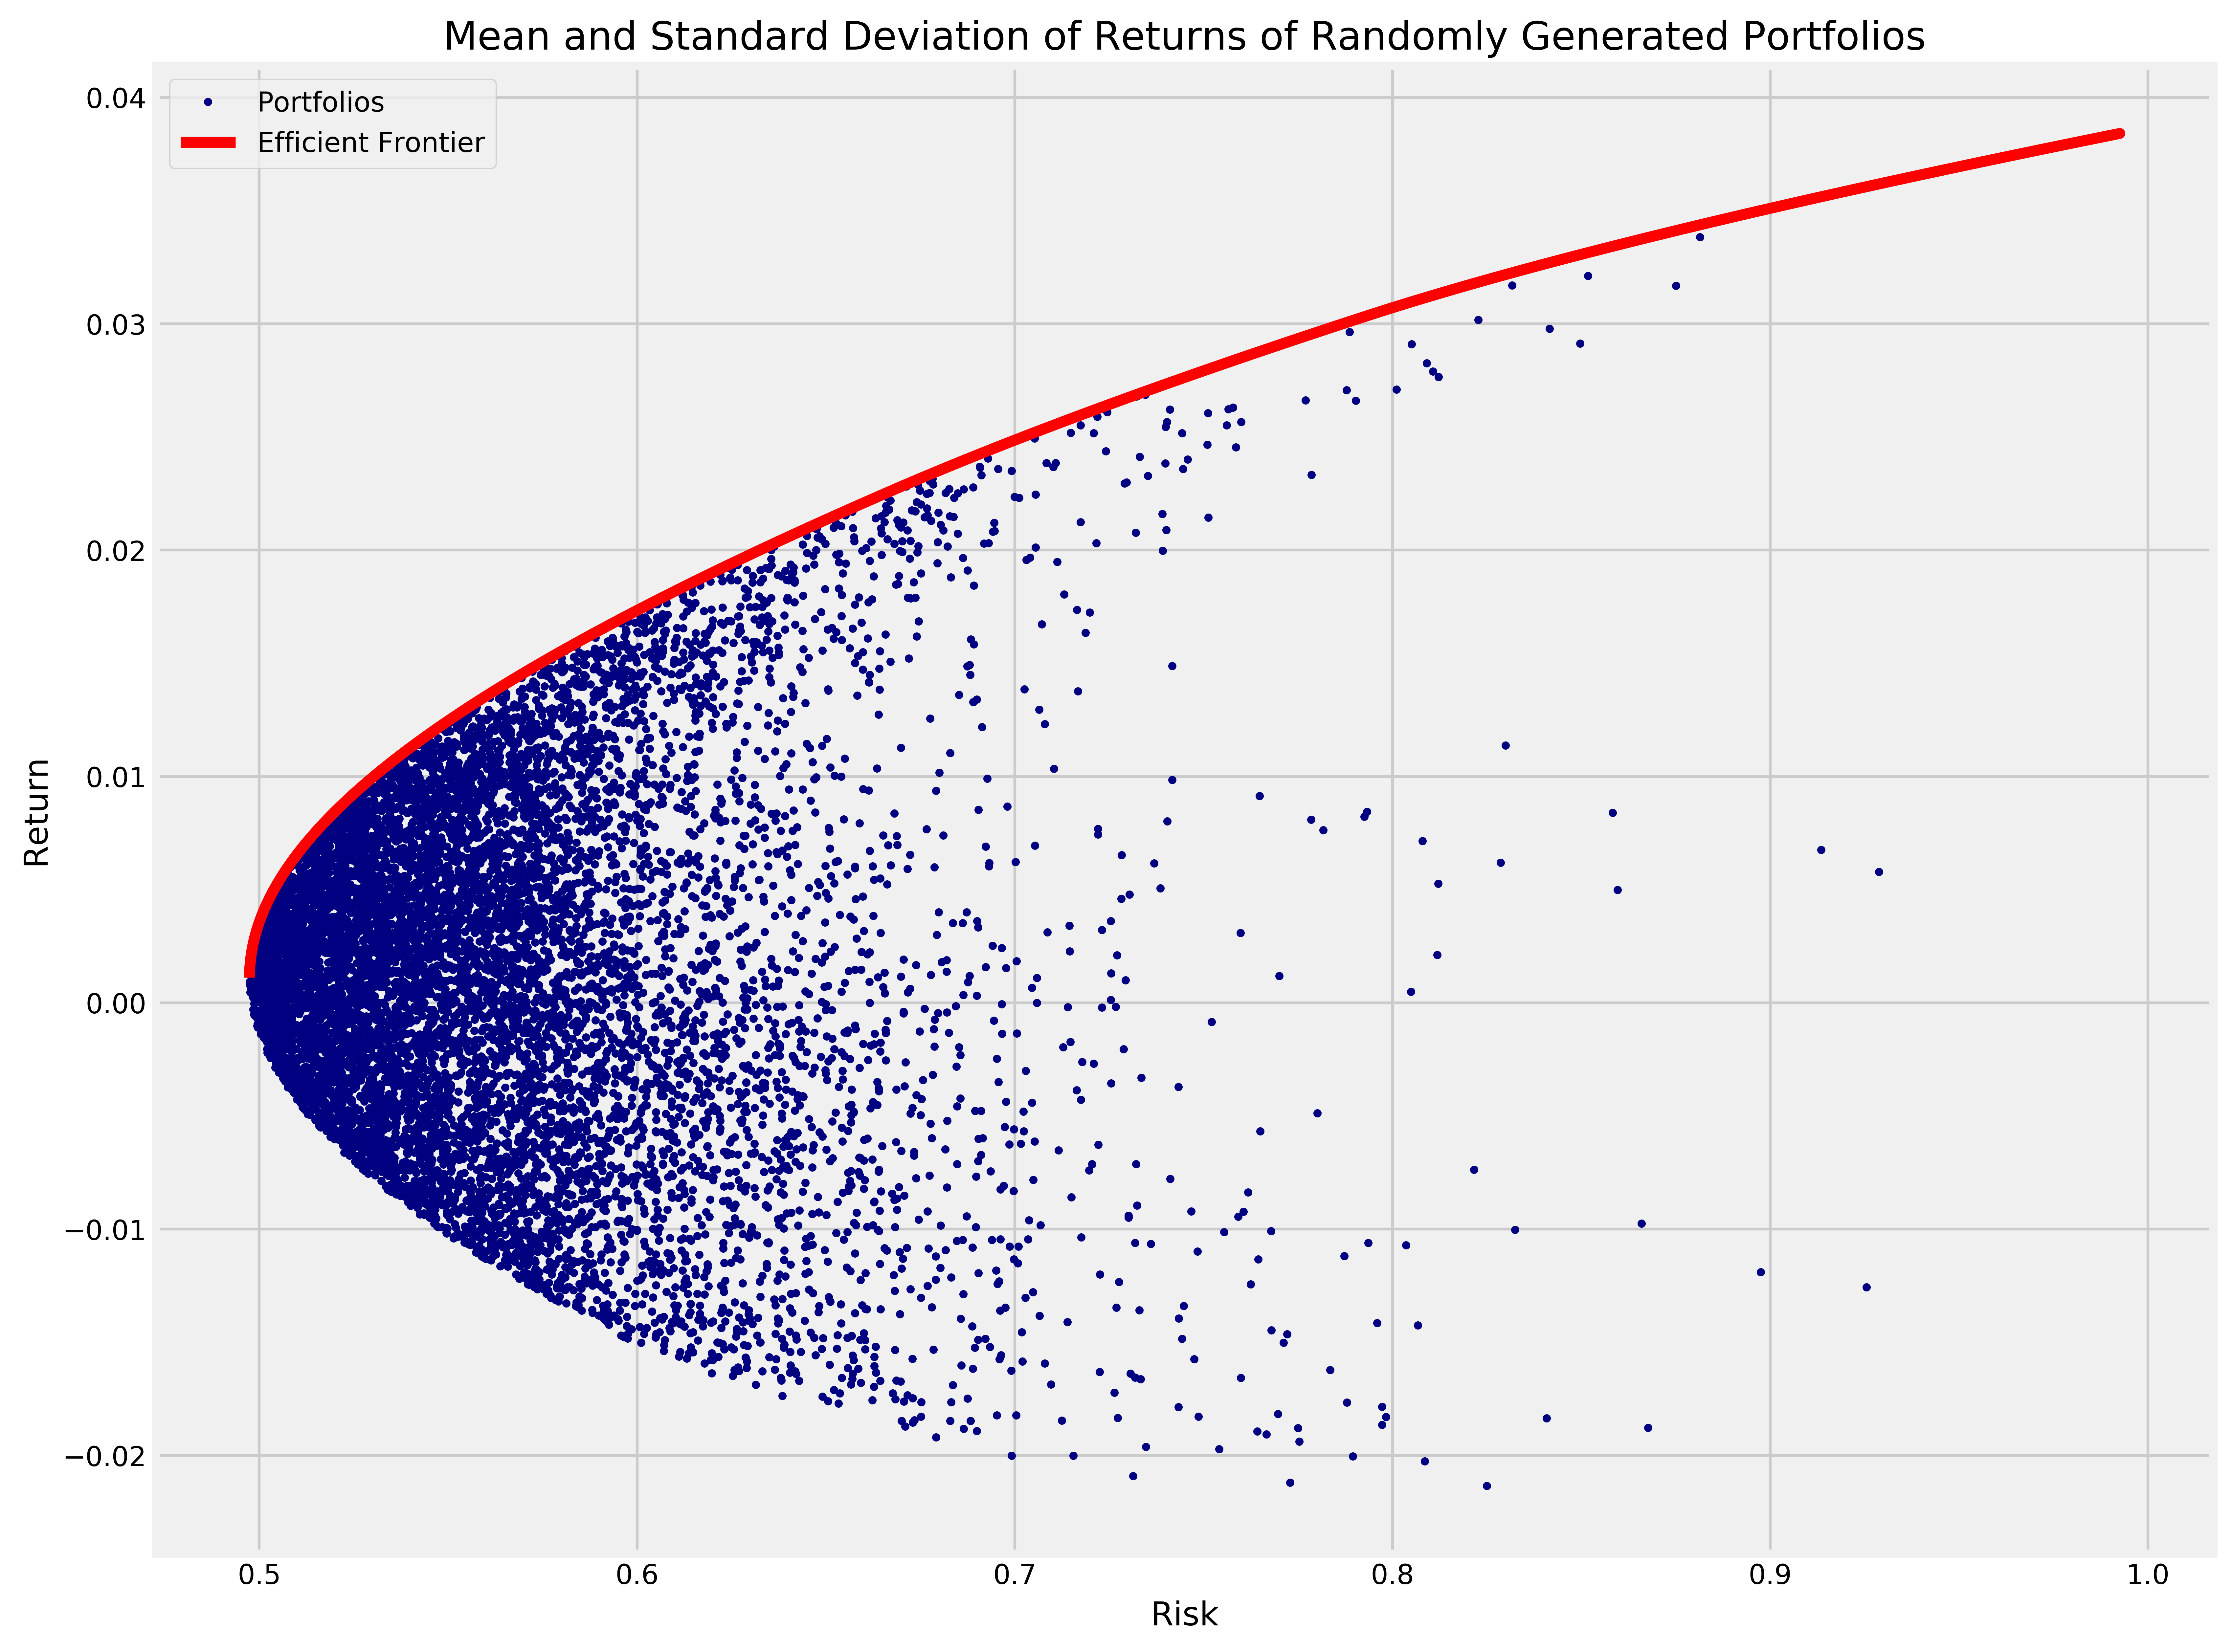

In [5]:
plt.figure(figsize=(12,10), dpi = 600)
plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Mean and Standard Deviation of Returns of Randomly Generated Portfolios');

plt.plot(risks, returns, '-', markersize=3, color='red');
plt.legend(['Portfolios', 'Efficient Frontier']);